In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sir_utilities import *

from scipy.integrate import solve_ivp

Reproduction number R0= 0.9956709956709958
Globally asymptotically stable if beta <=d+nu+mu0. This is False


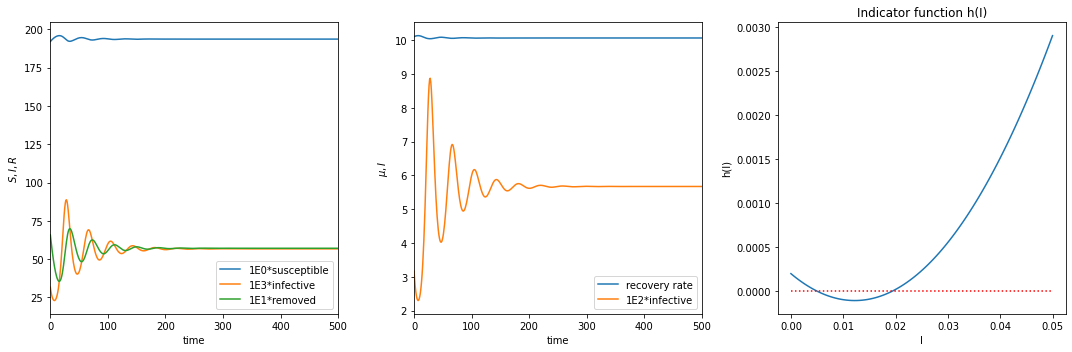

In [2]:
# parameters
random_state = 12345
t_0 = 0
t_end = 1000
NT = t_end-t_0
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol=1e-8
atol=1e-8

# SIR model parameters
beta=11.5
A=20
d=0.1
nu=1
b=0.01 # try to set this to 0.01, 0.020, ..., 0.022, ..., 0.03
mu0 = 10   # minimum recovery rate
mu1 = 10.45  # maximum recovery rate

# information
print("Reproduction number R0=", R0(beta, d, nu, mu1))
print('Globally asymptotically stable if beta <=d+nu+mu0. This is', beta <= d+nu+mu0)

# simulation
rng = np.random.default_rng(random_state)

SIM0 = rng.uniform(low=(190, 0, 1), high=(199,0.1,8), size=(3,))

time = np.linspace(t_0,t_end,NT)
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='LSODA', rtol=rtol, atol=atol)

# plot from right to left: SIR plot, recovery_rate vs infected, indicator function
plot_SIR_variables(sol, b, mu0, mu1, beta, A, d, nu)

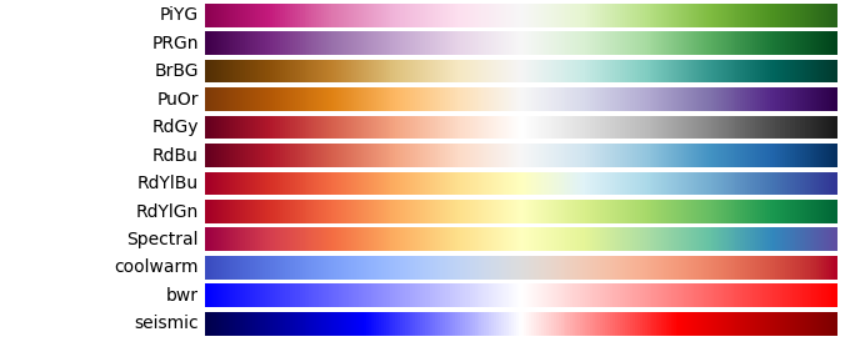


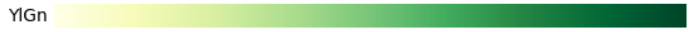

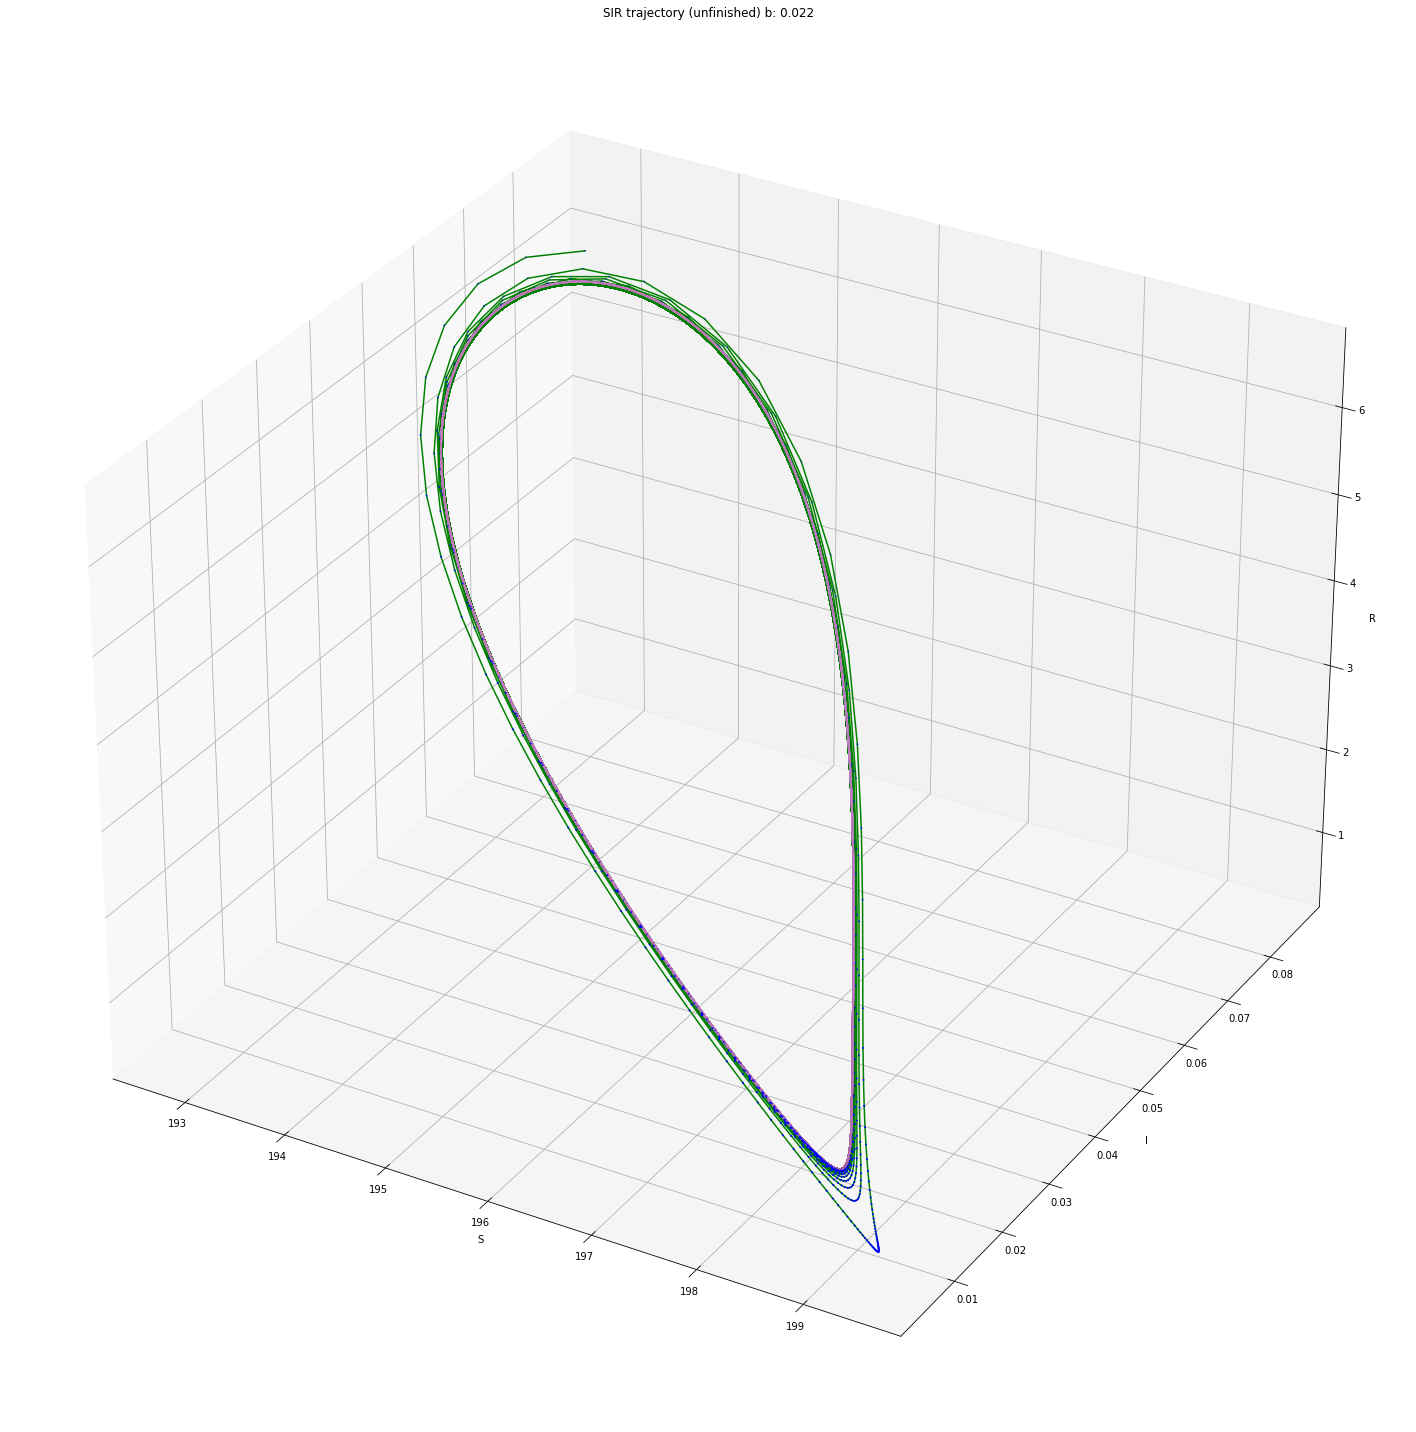

In [4]:
plot_SIR_trajectories(t_0=t_0, b=0.022, mu0=mu0, mu1=mu1, beta=beta, A=A, d=d, nu=nu)

C:\Users\alexp\AppData\Local\Temp/ipykernel_13296/2154739742.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(20,20))


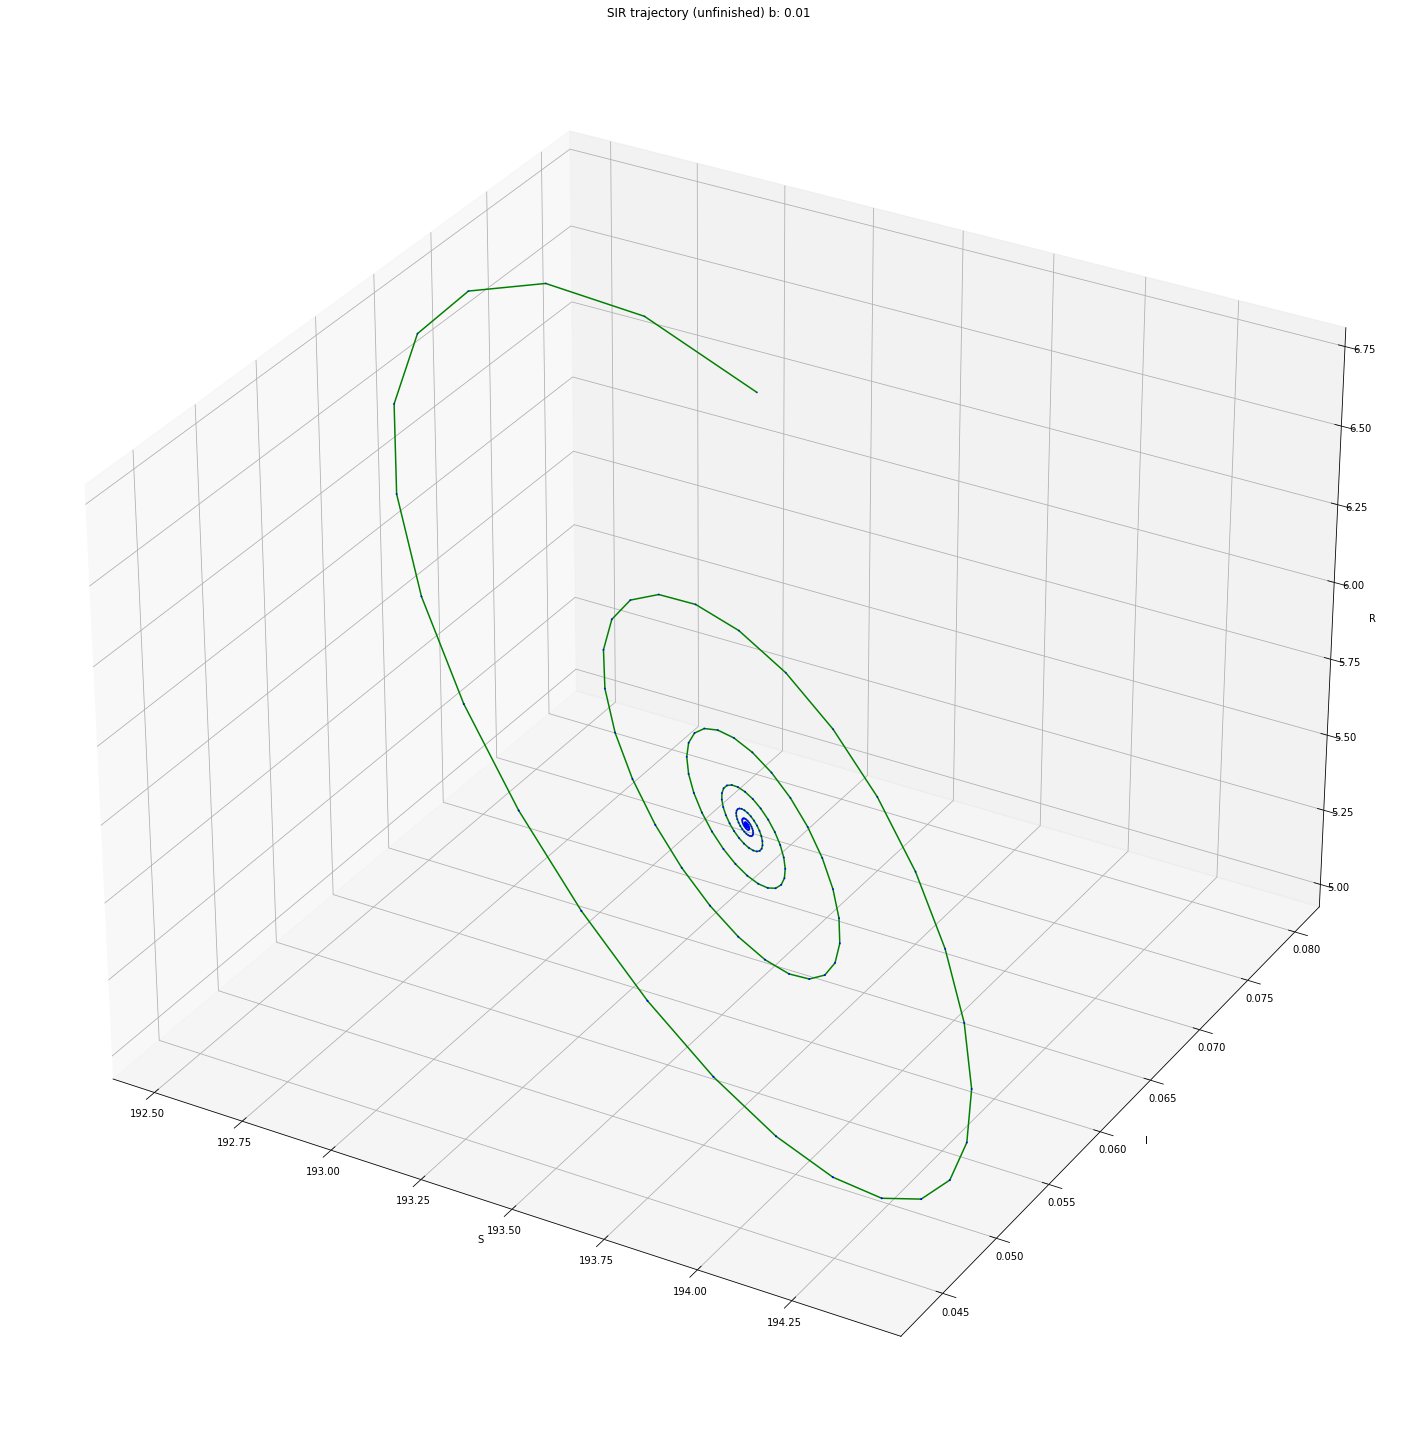

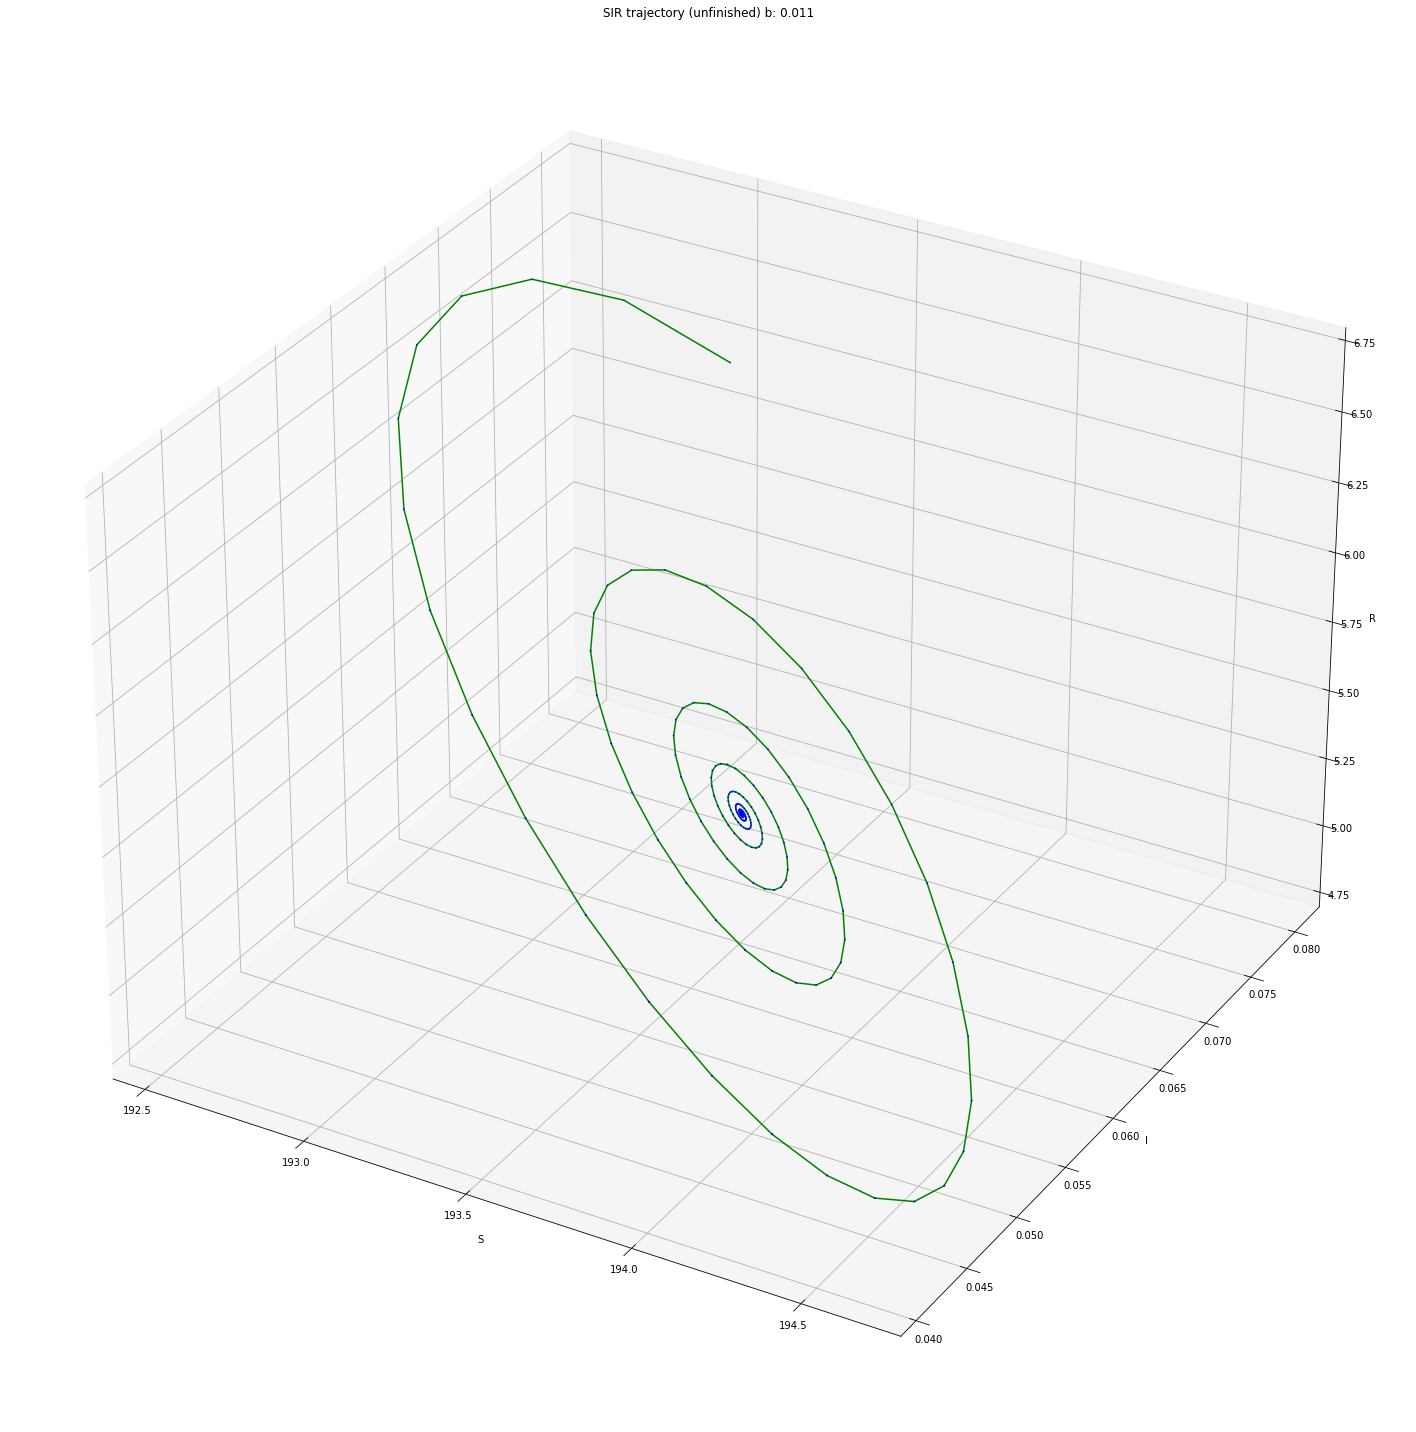

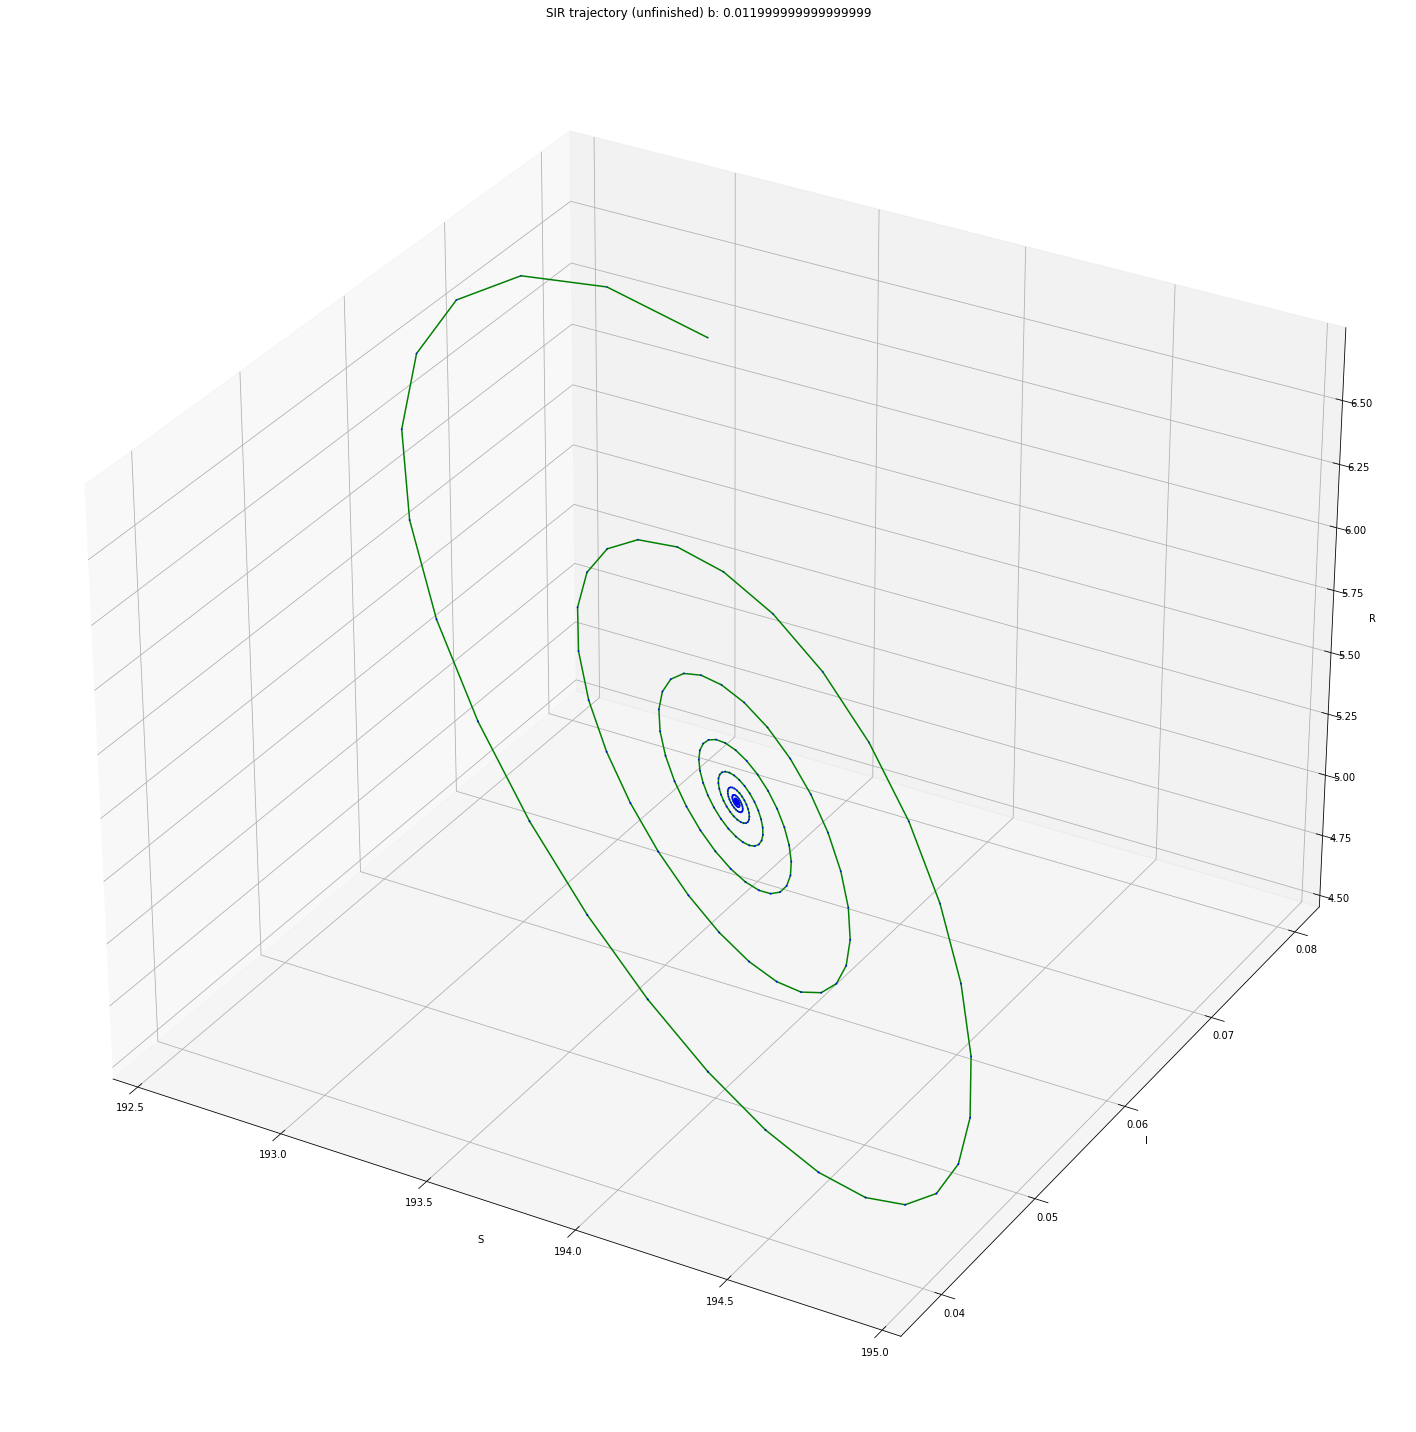

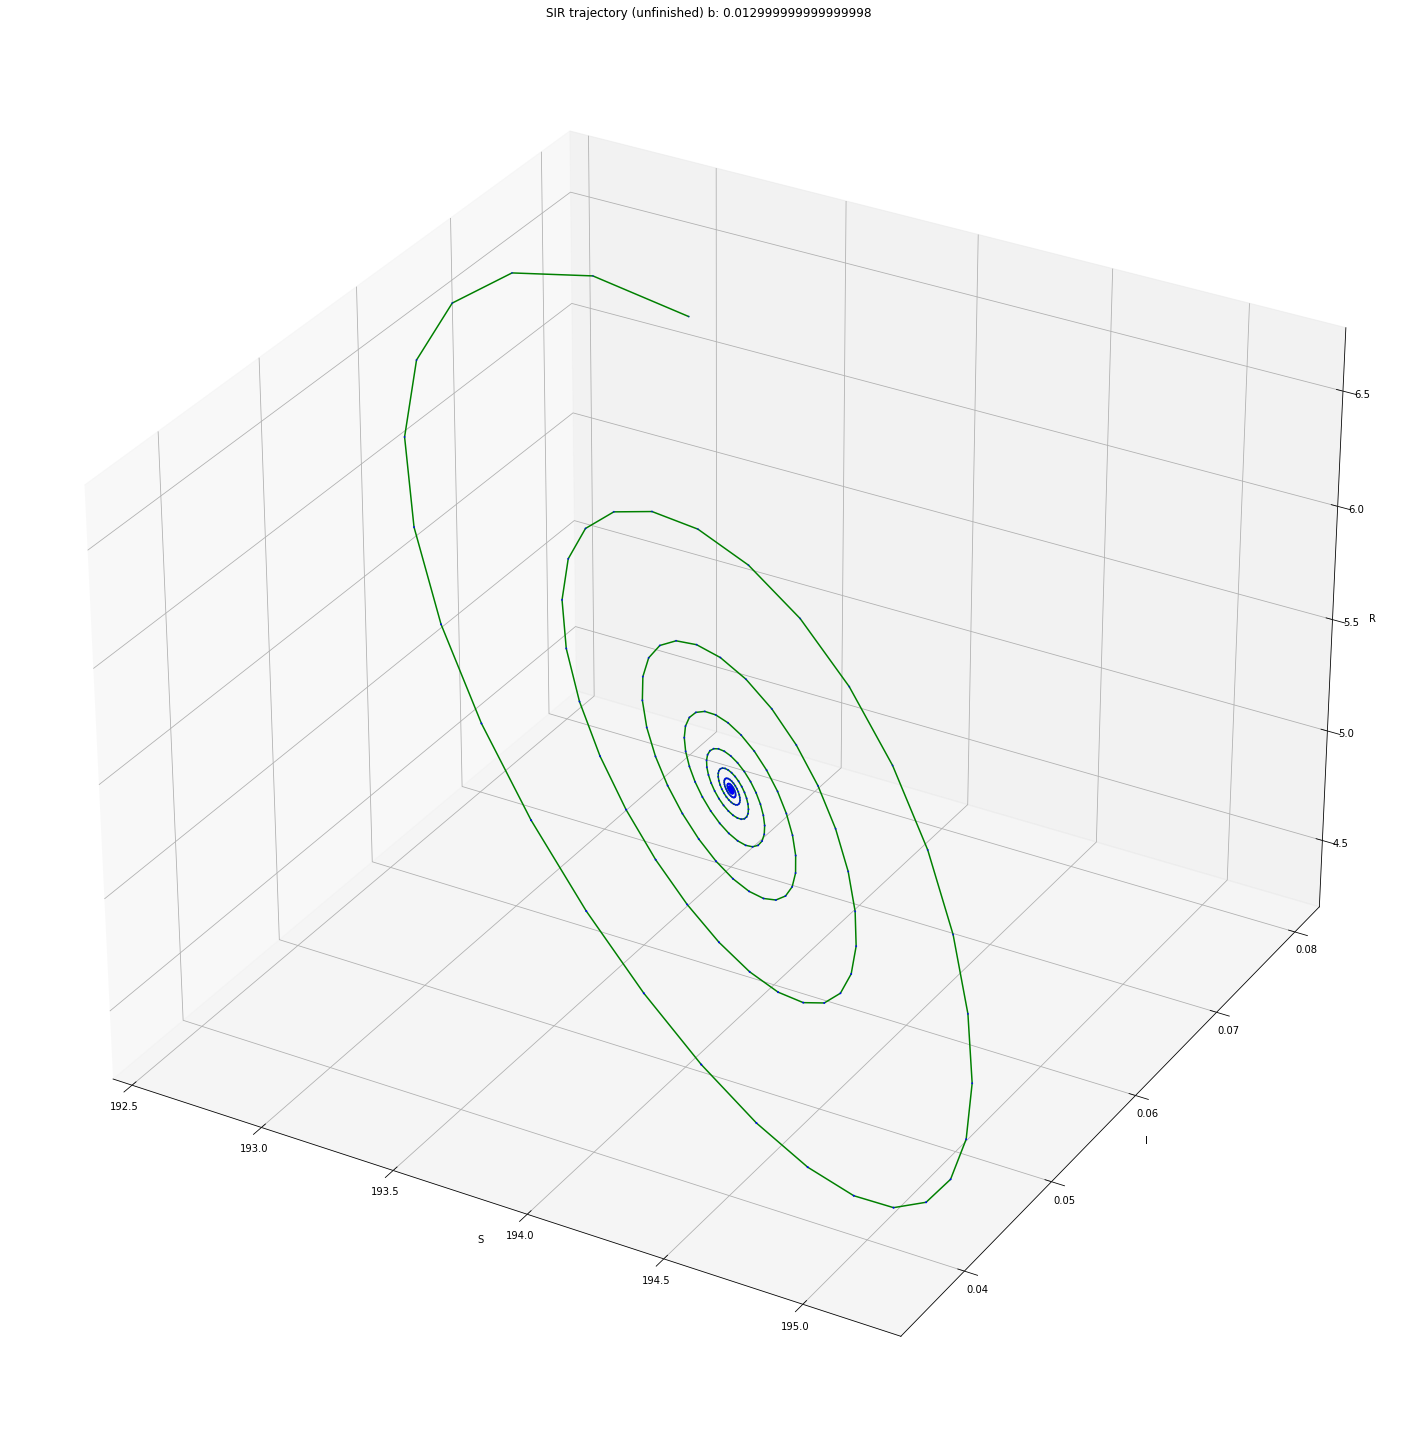

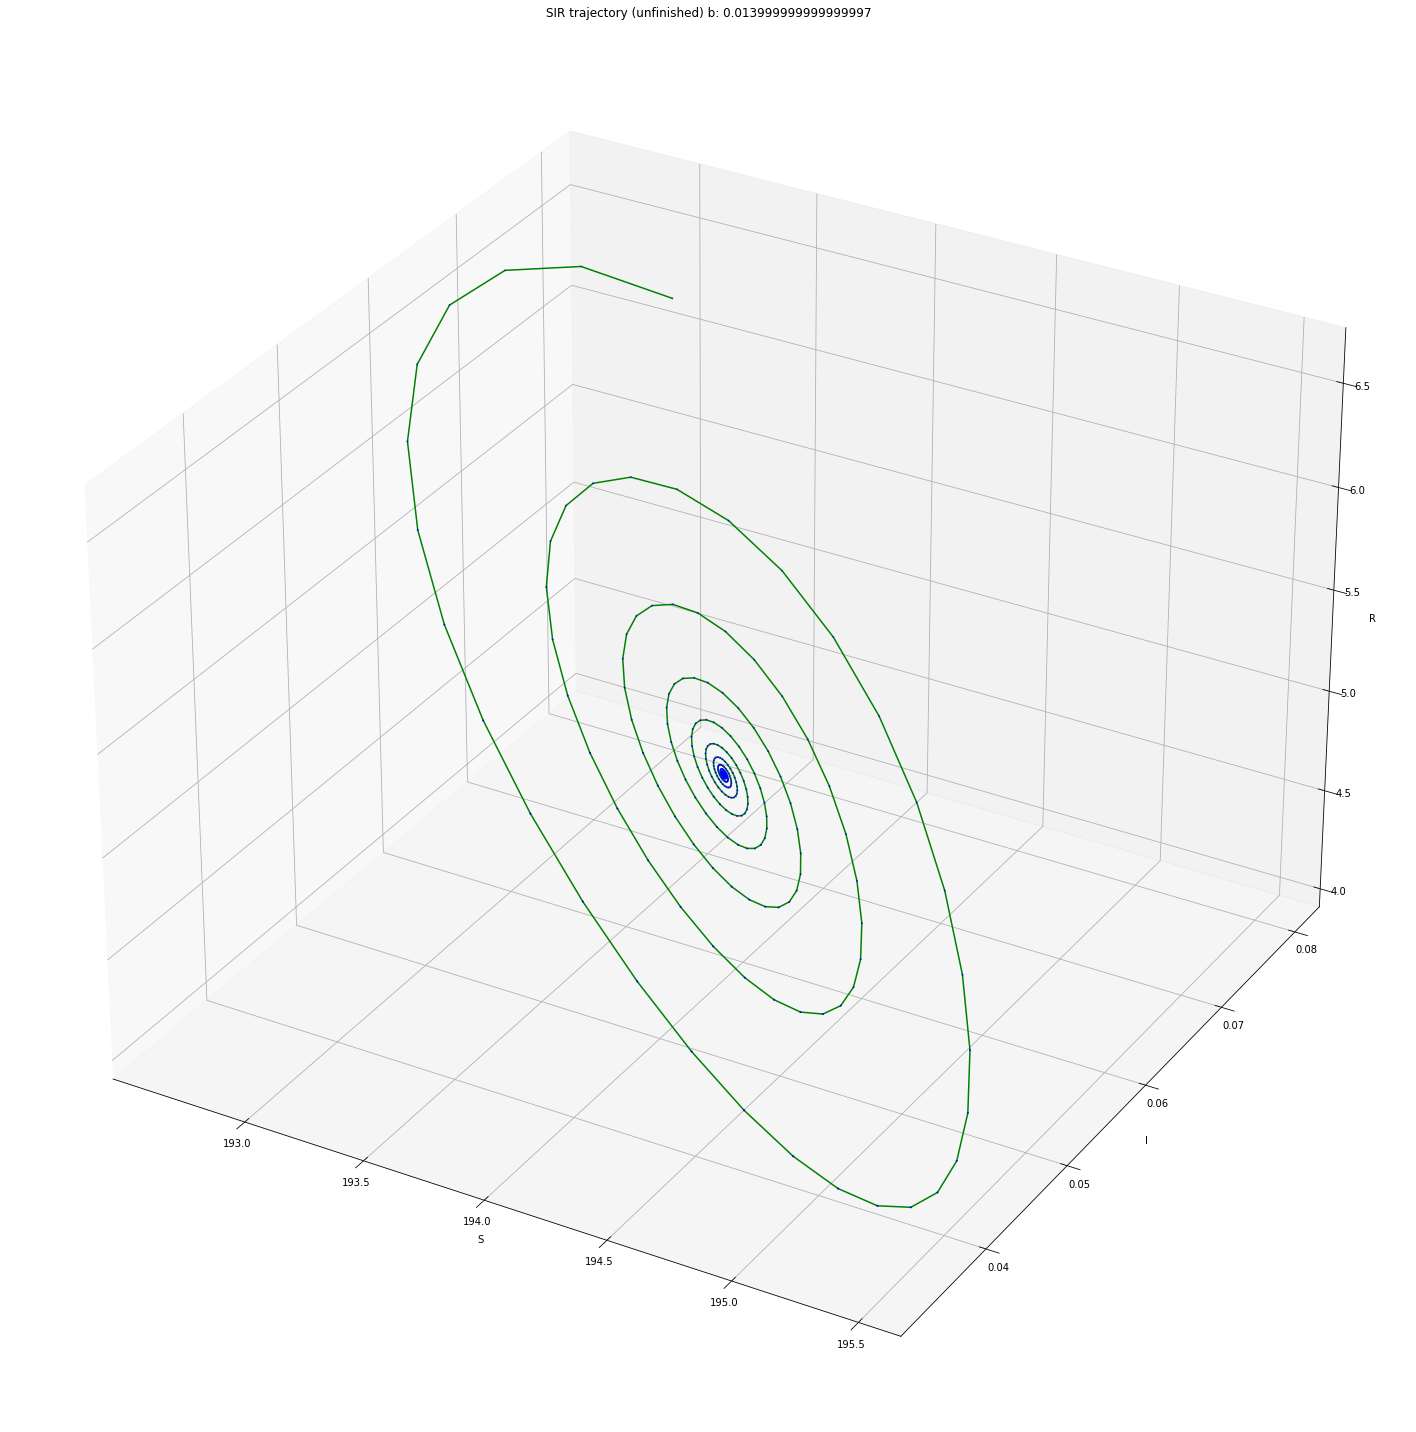

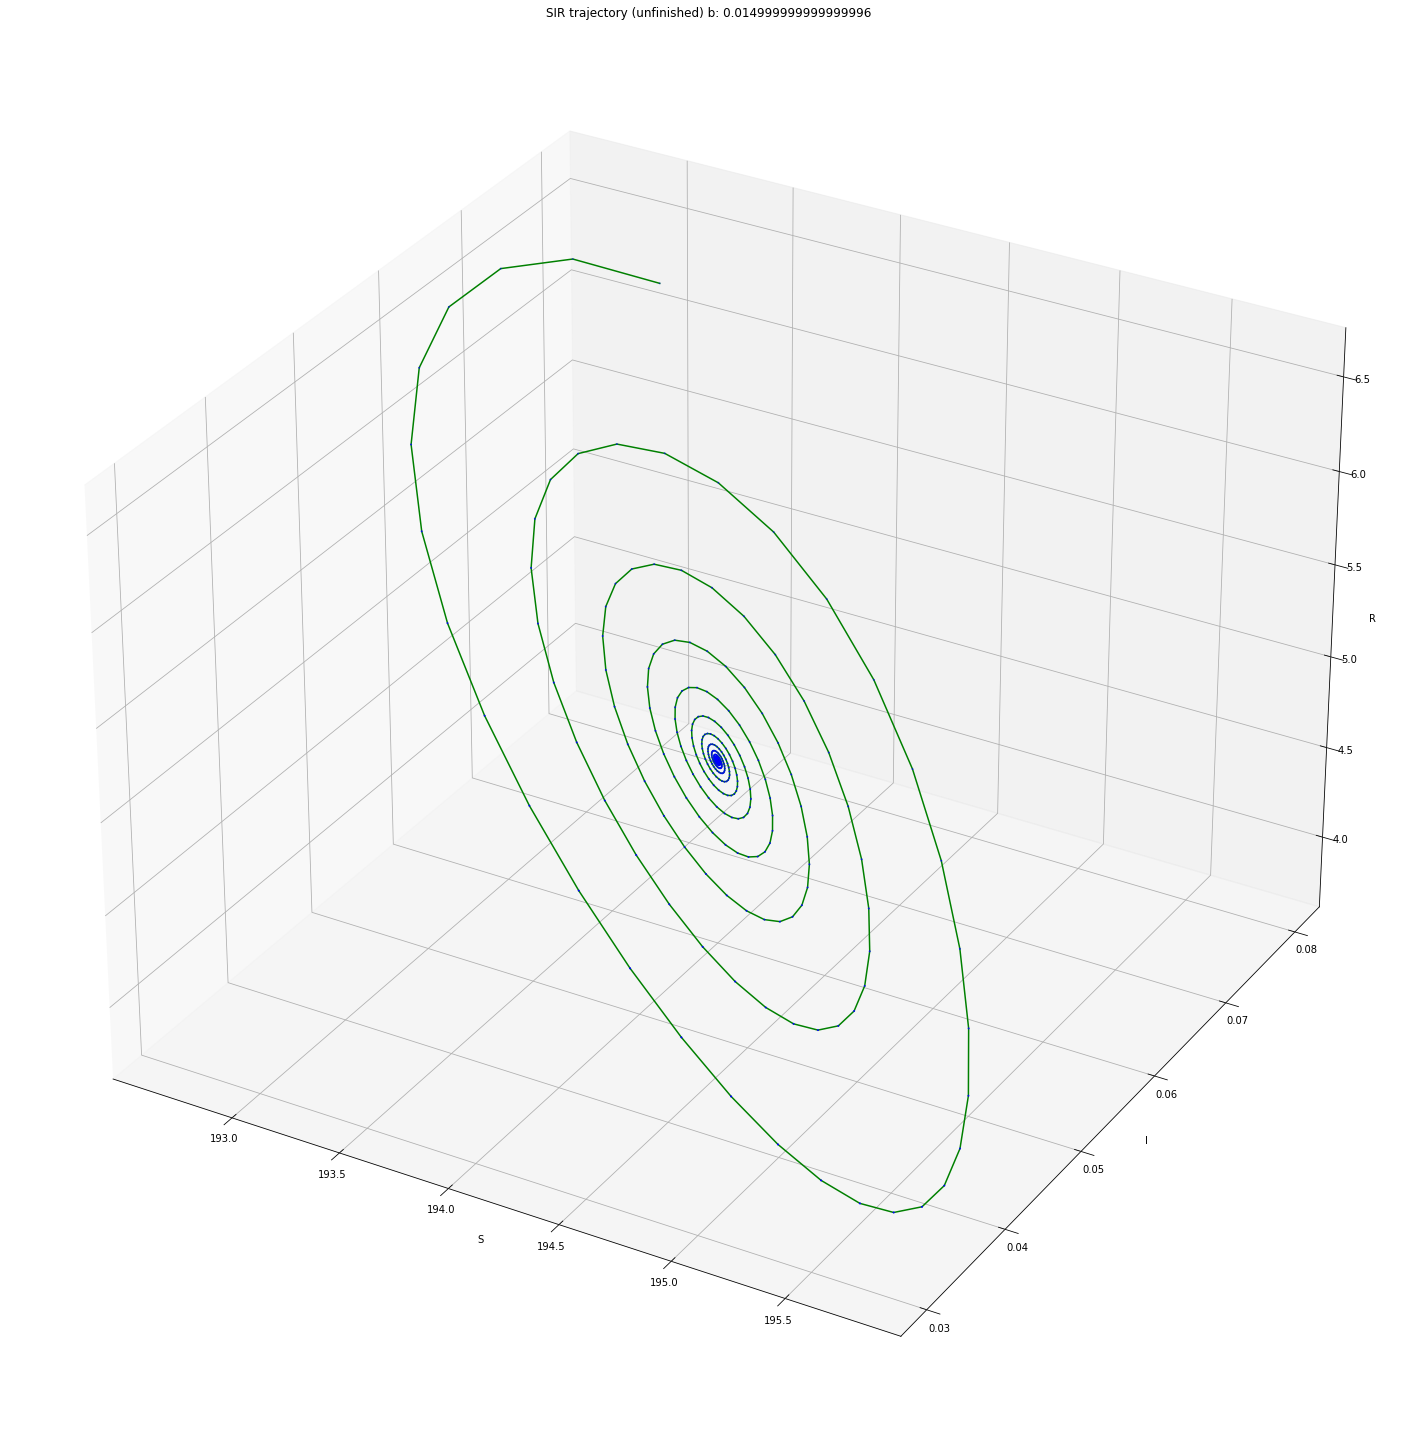

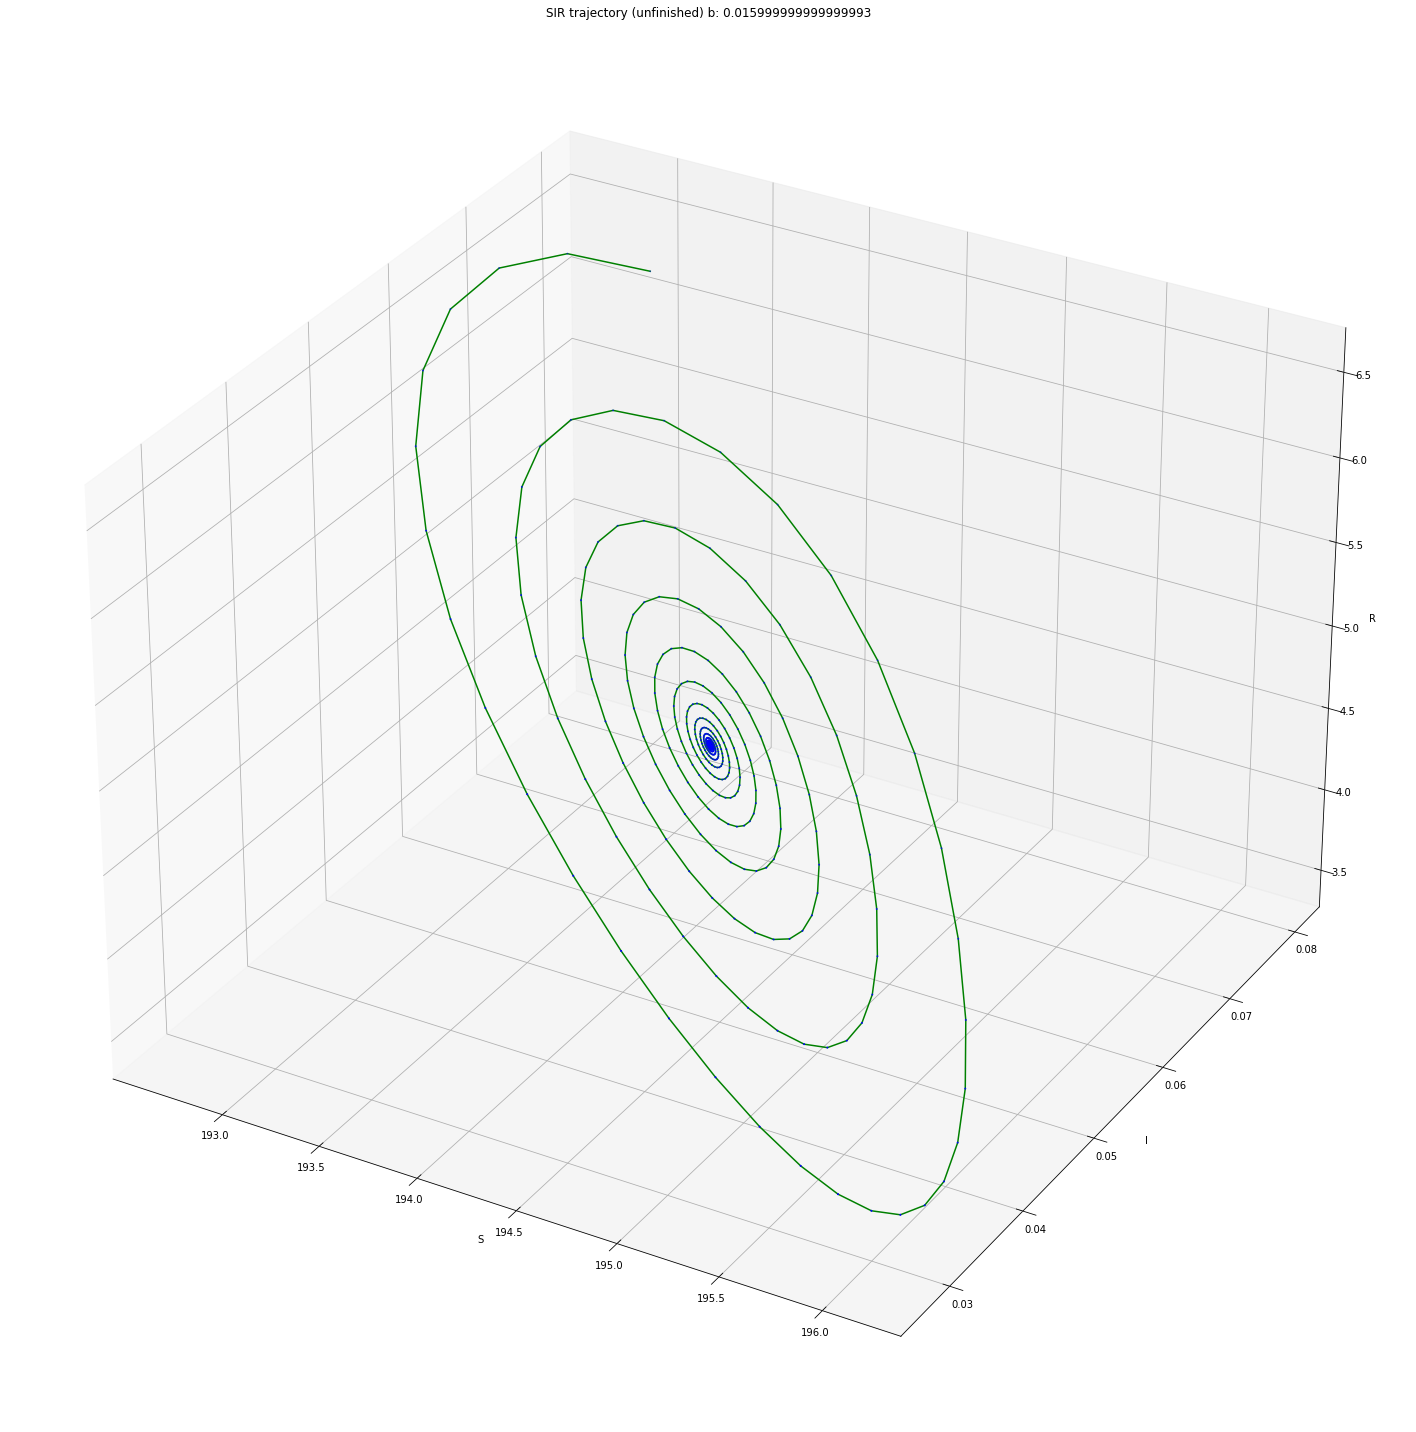

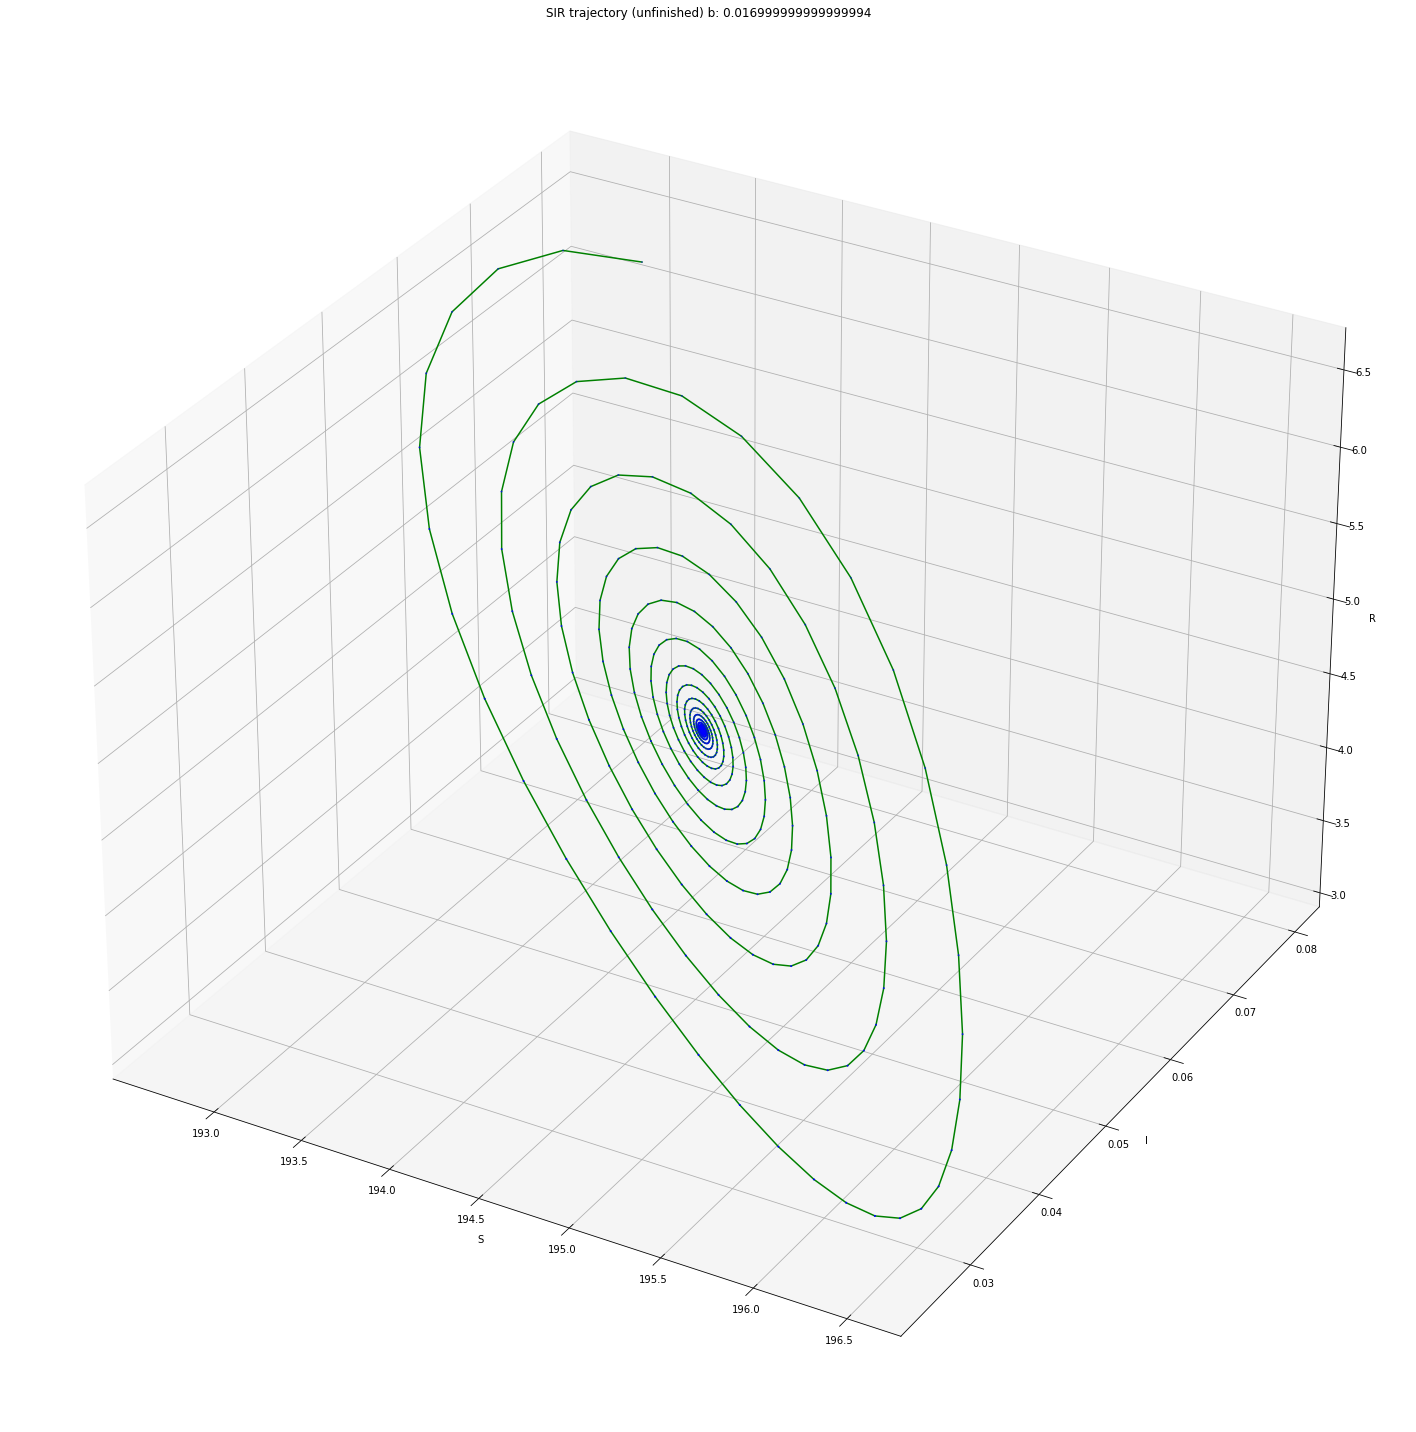

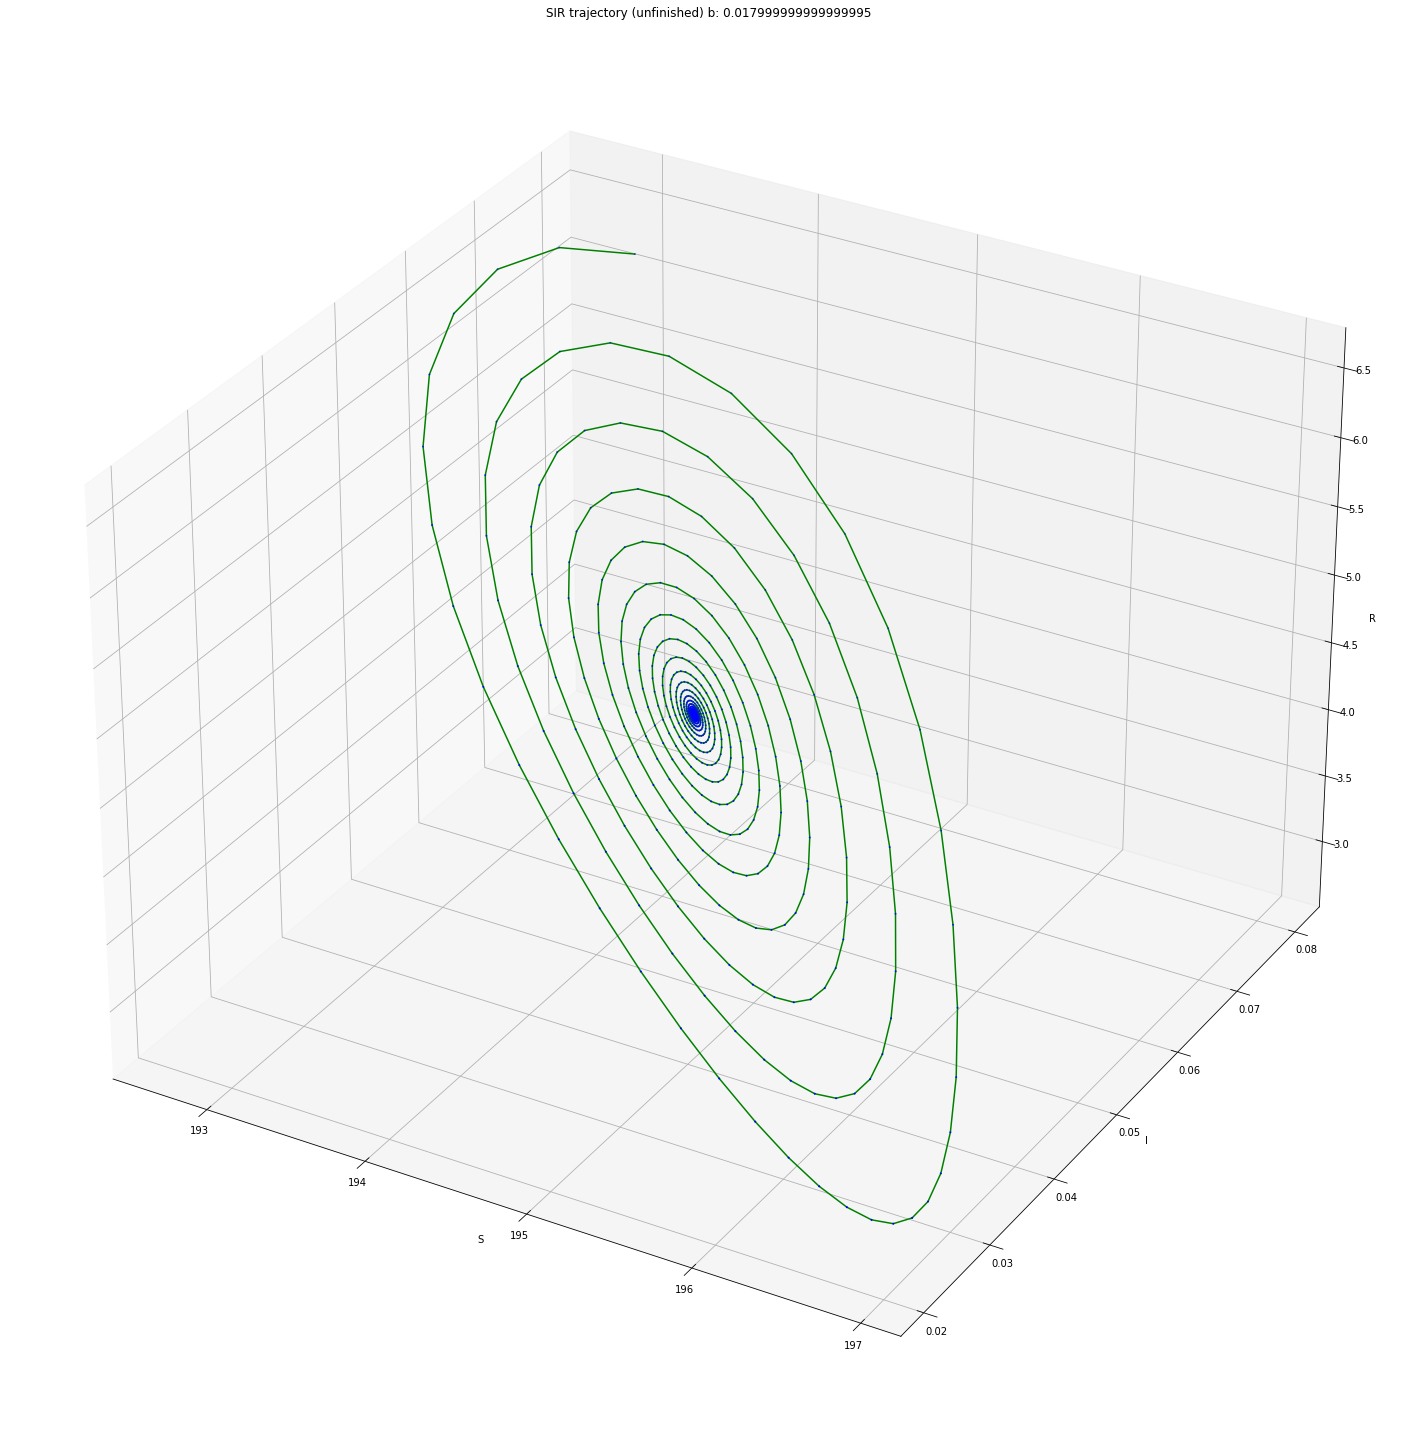

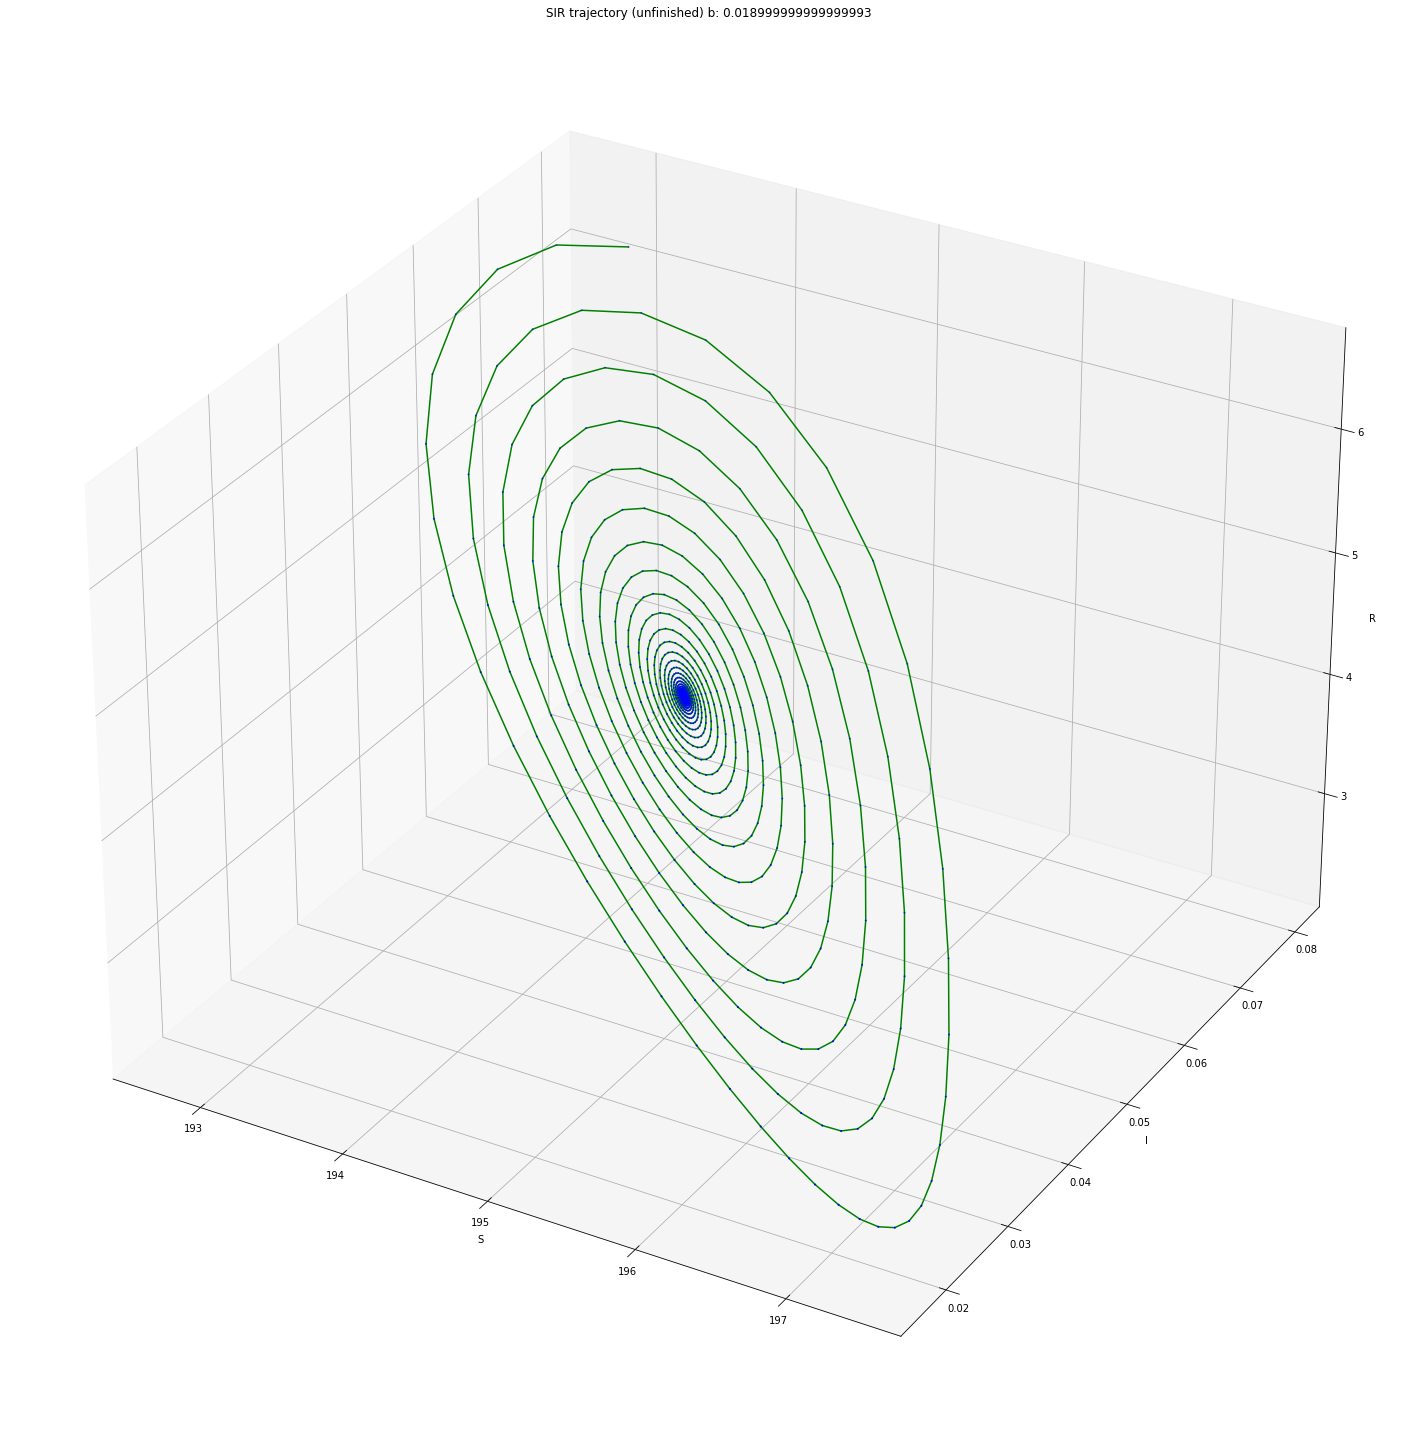

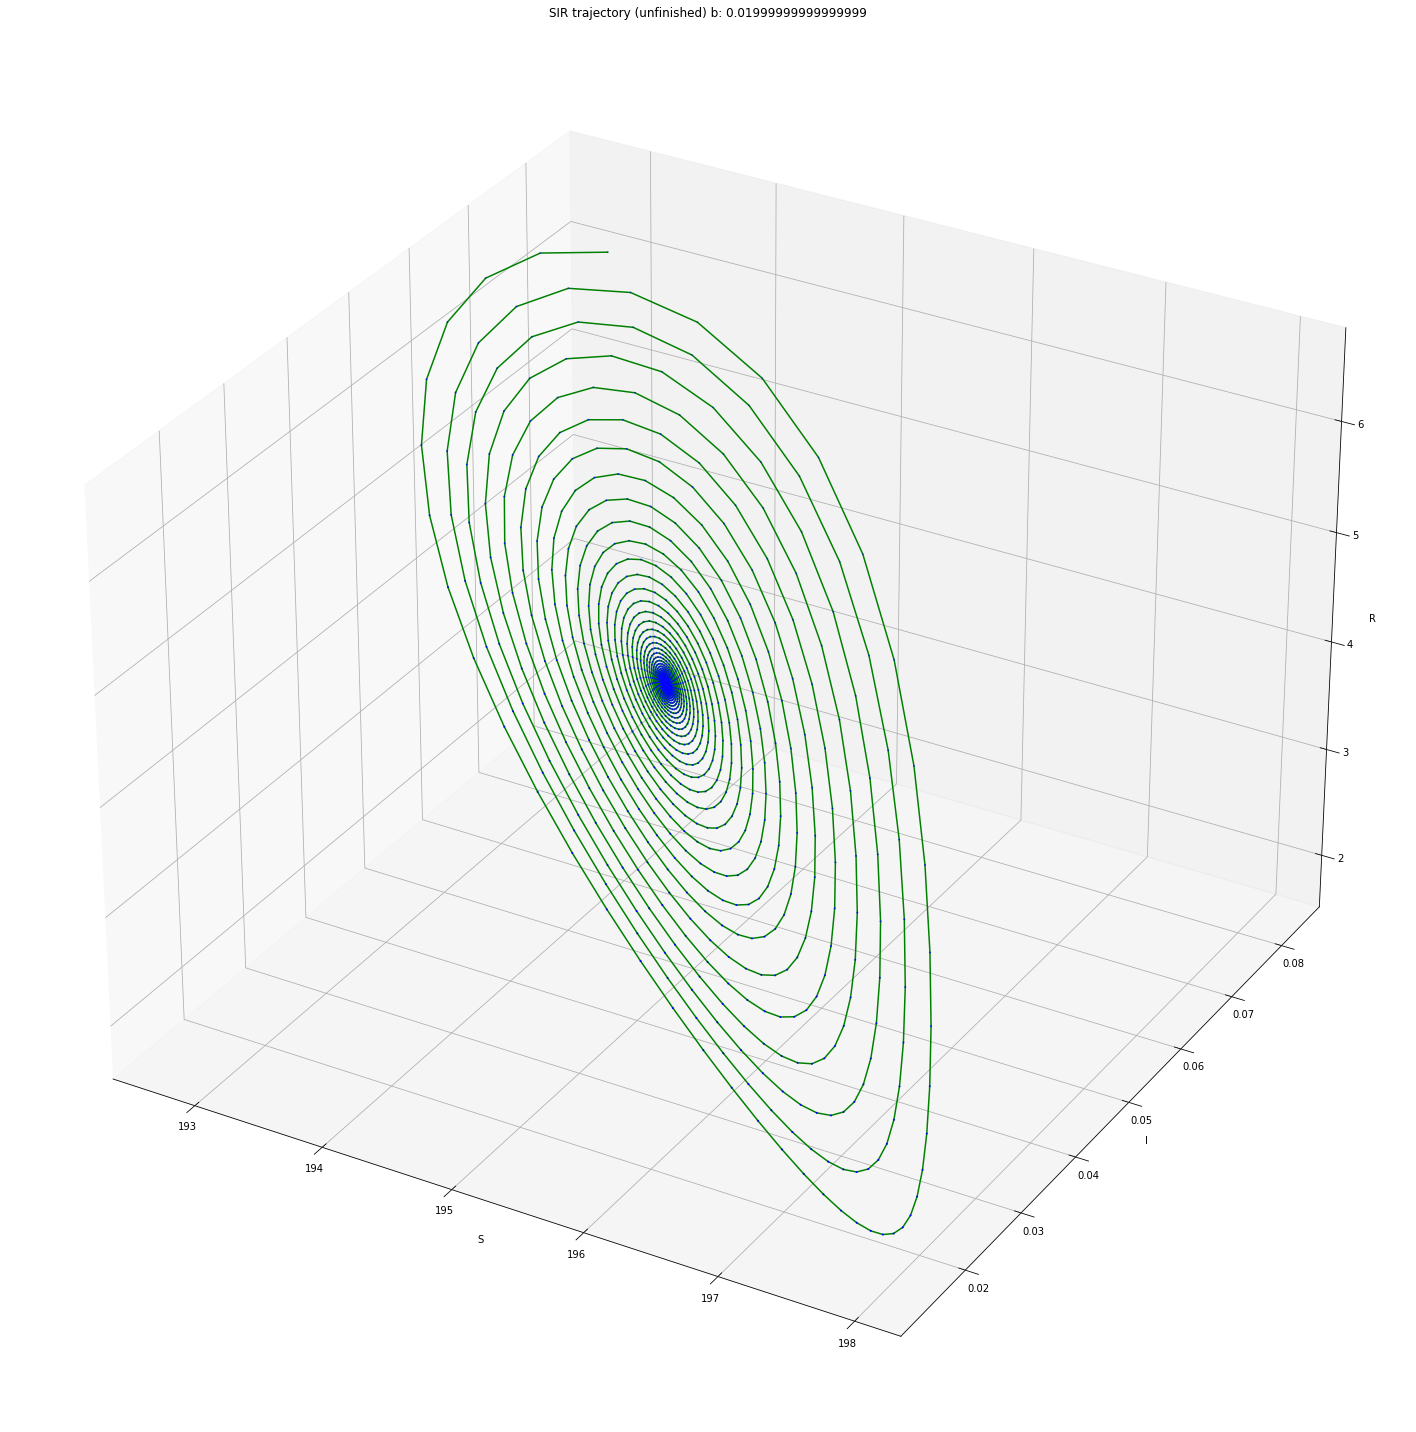

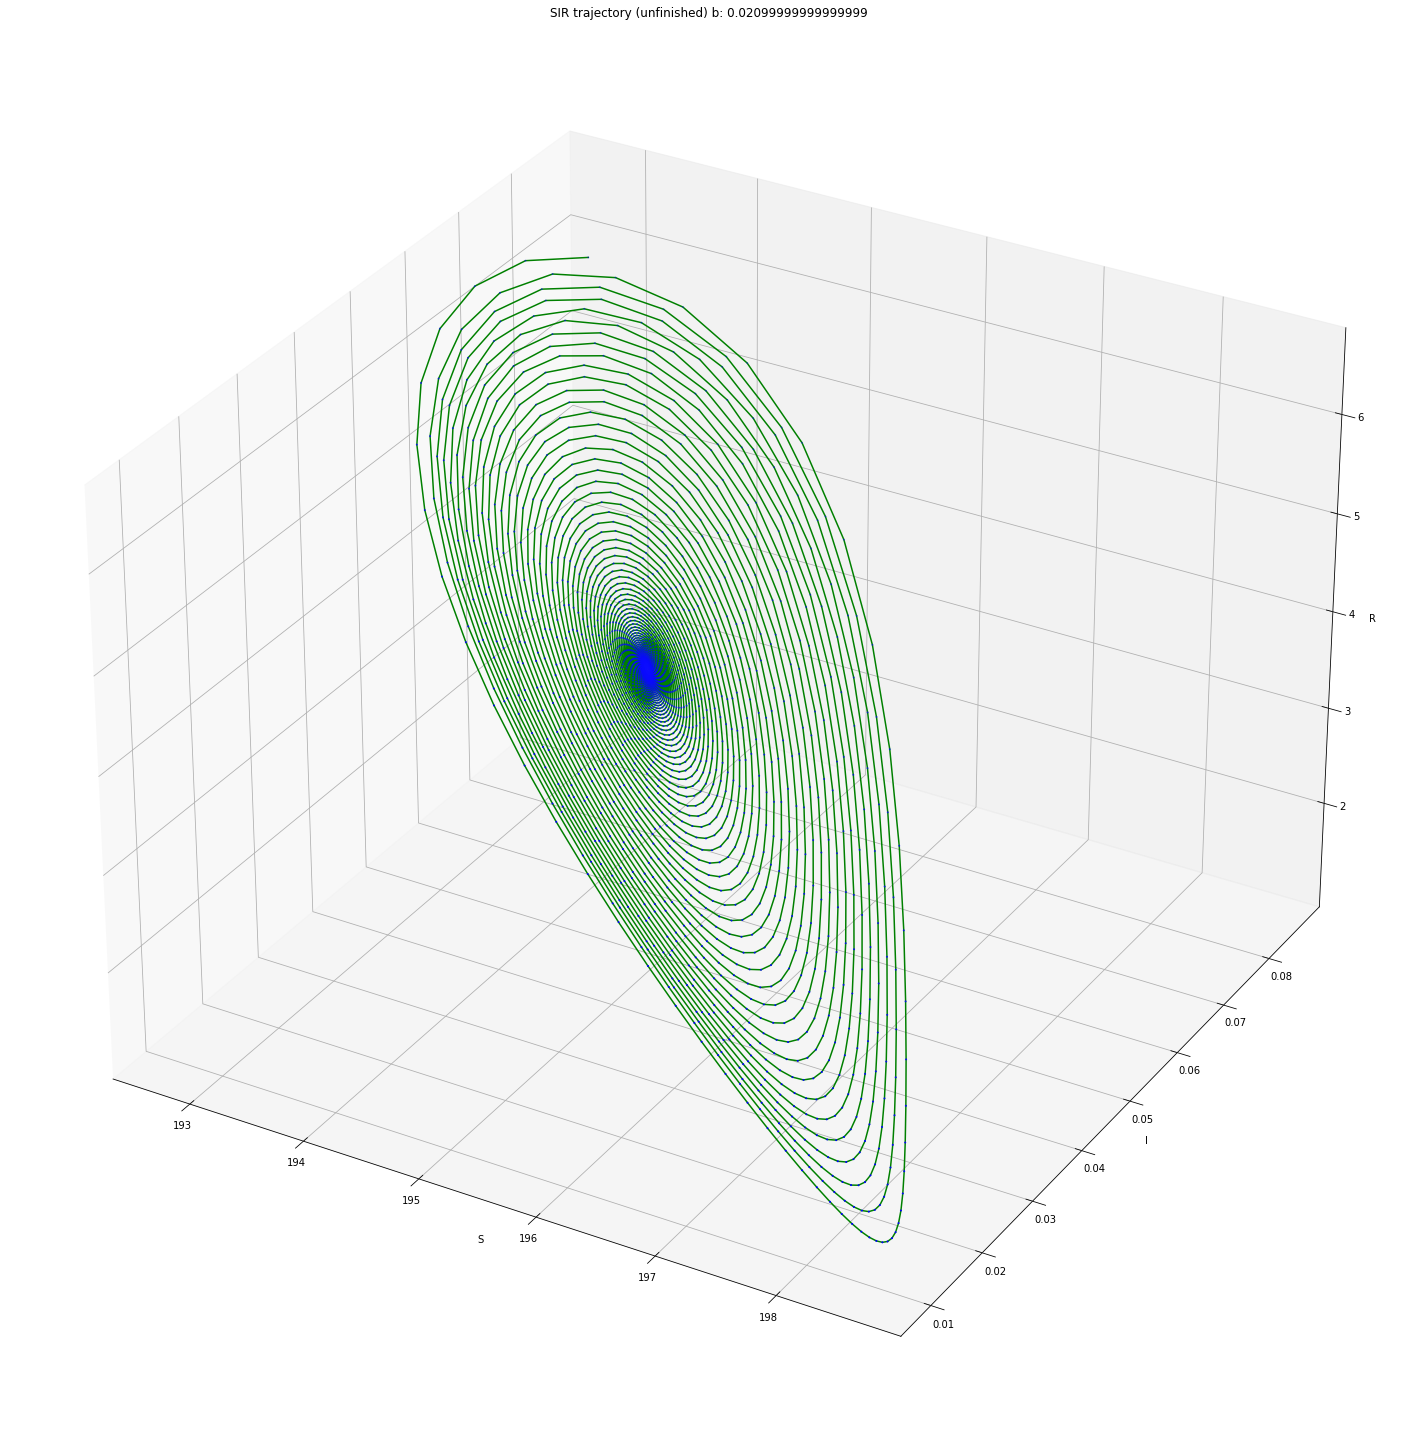

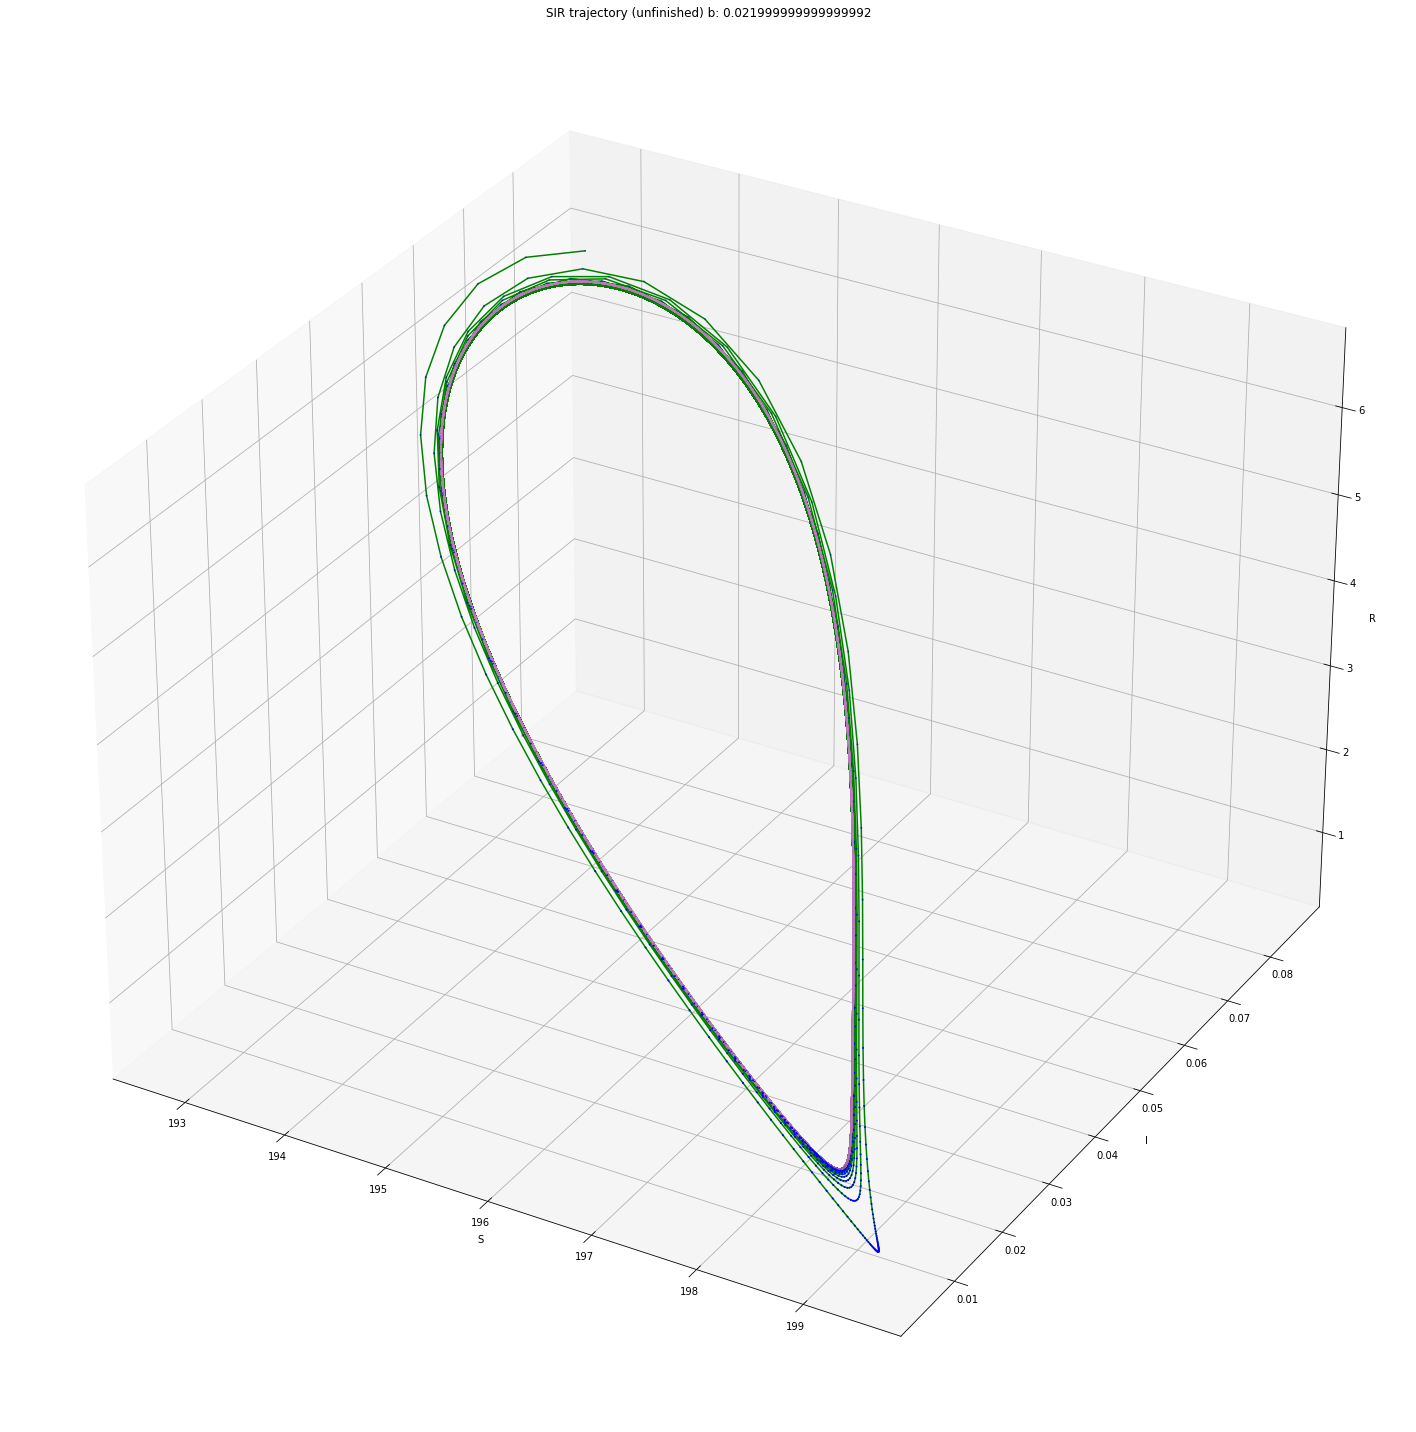

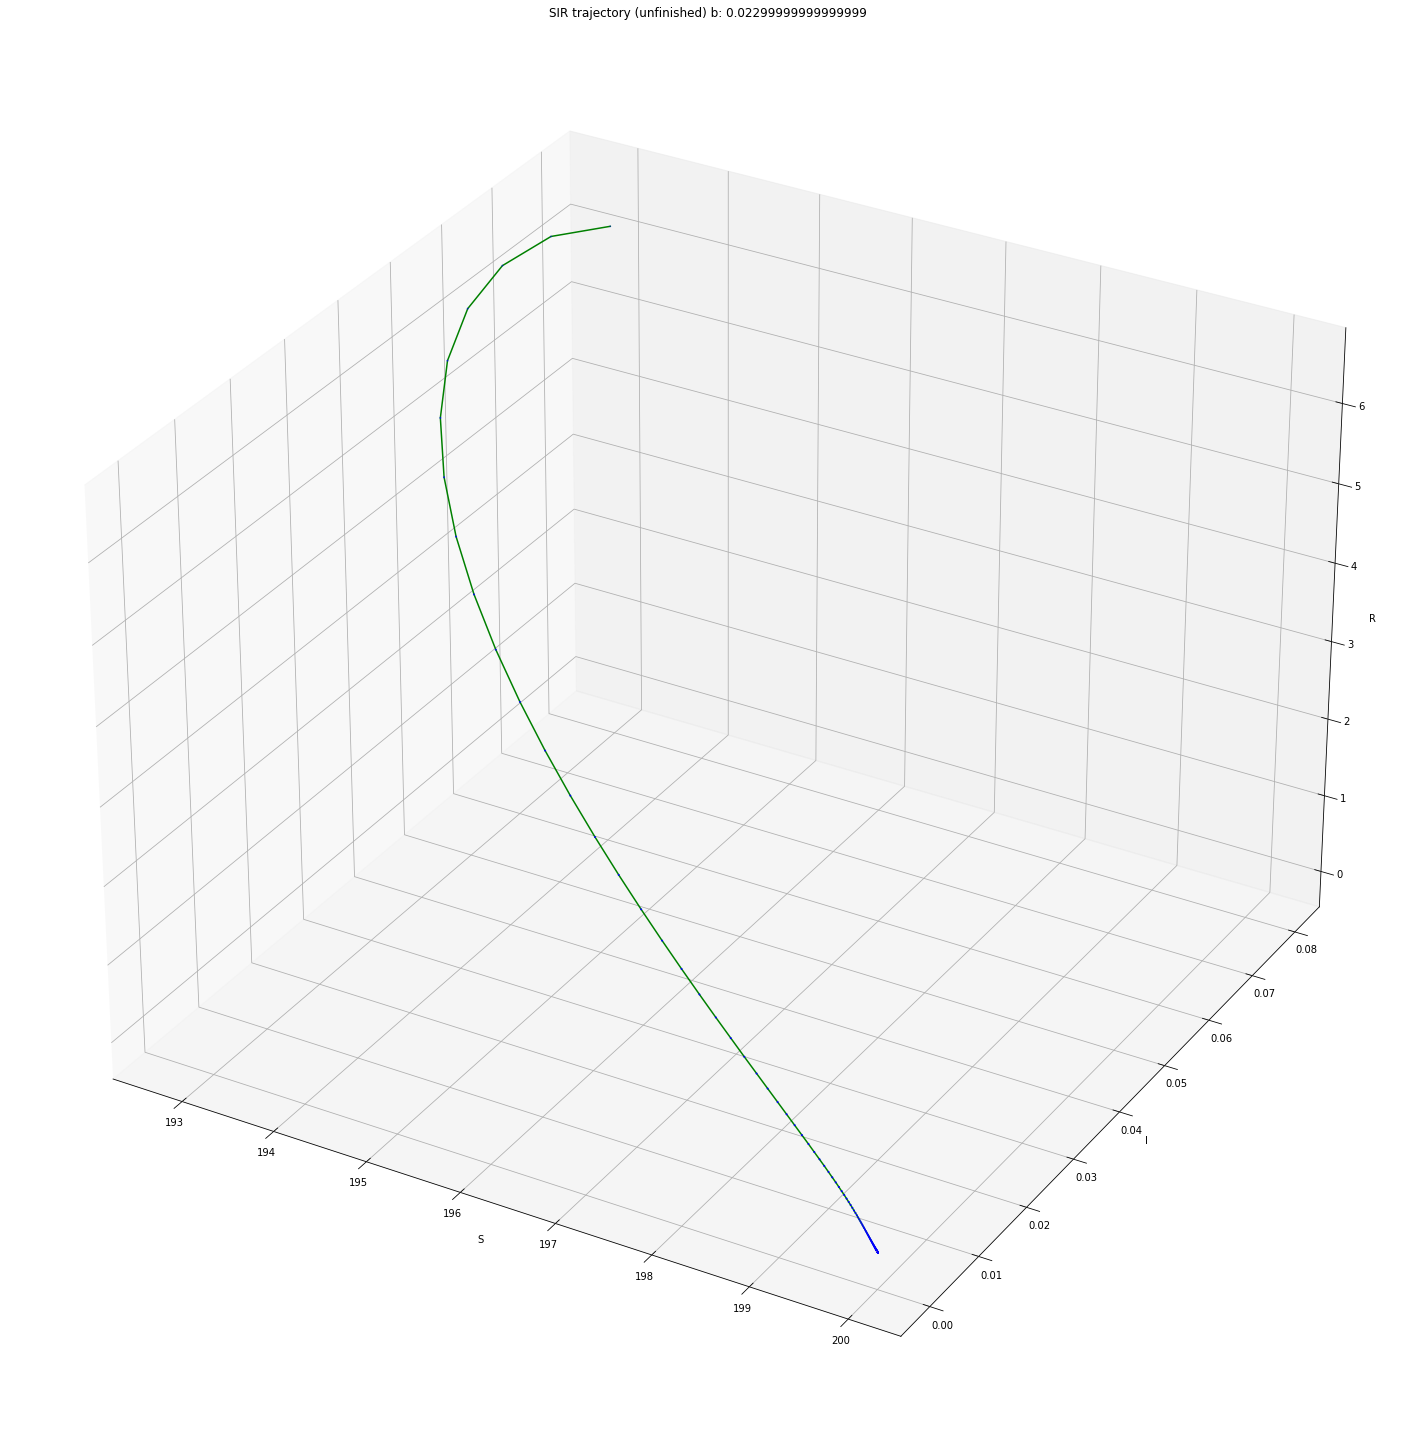

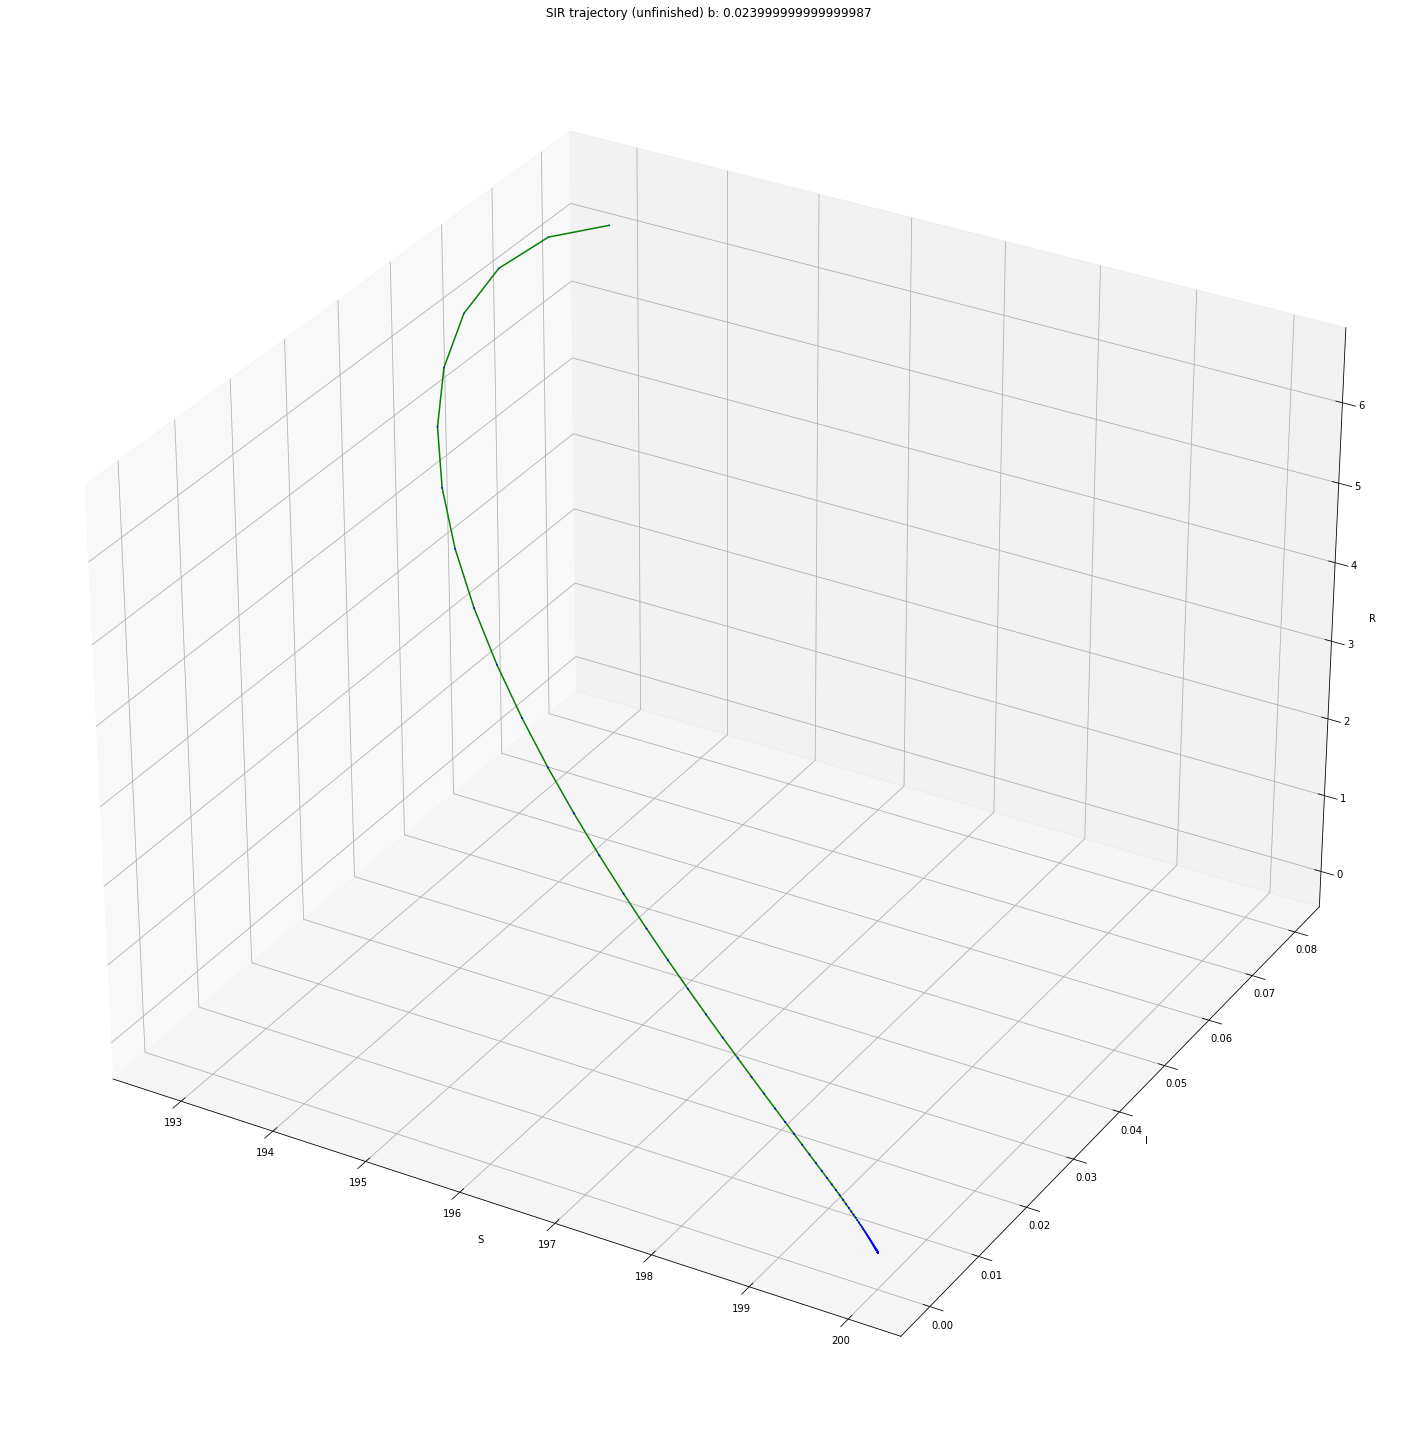

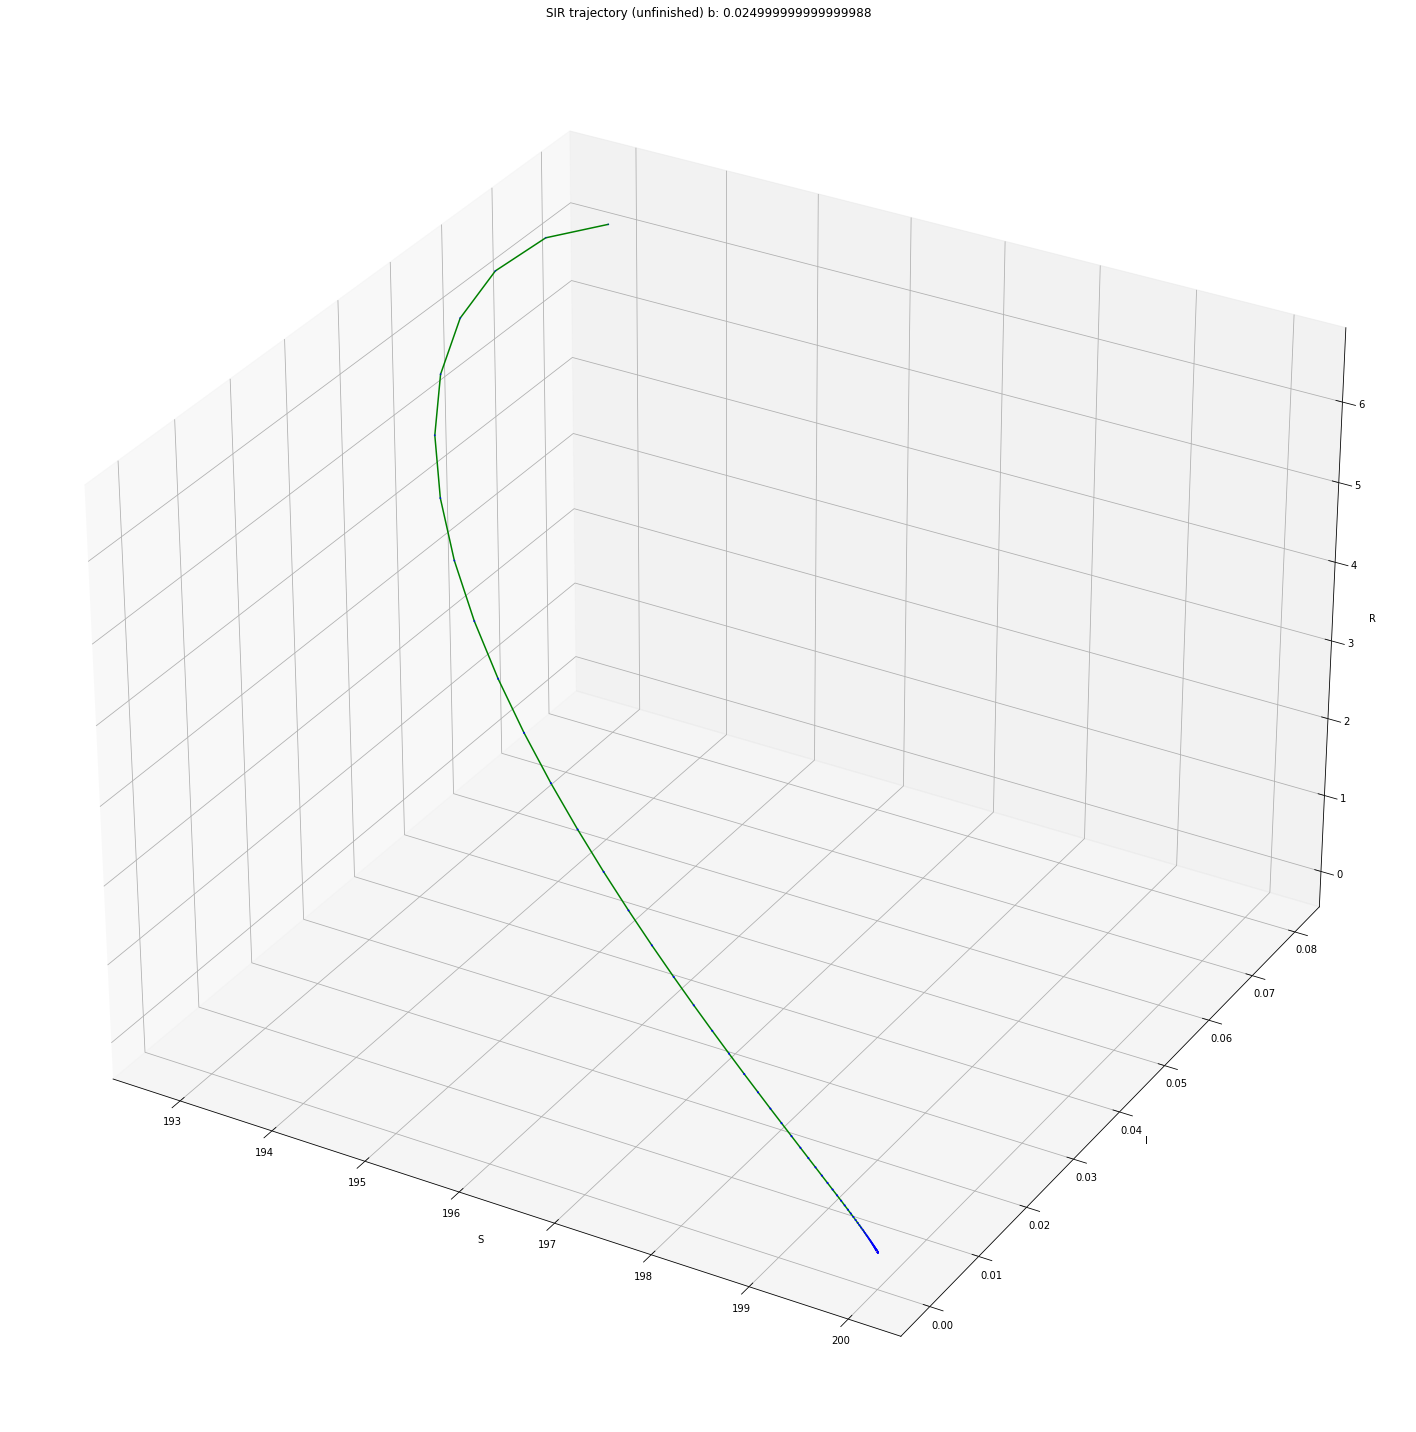

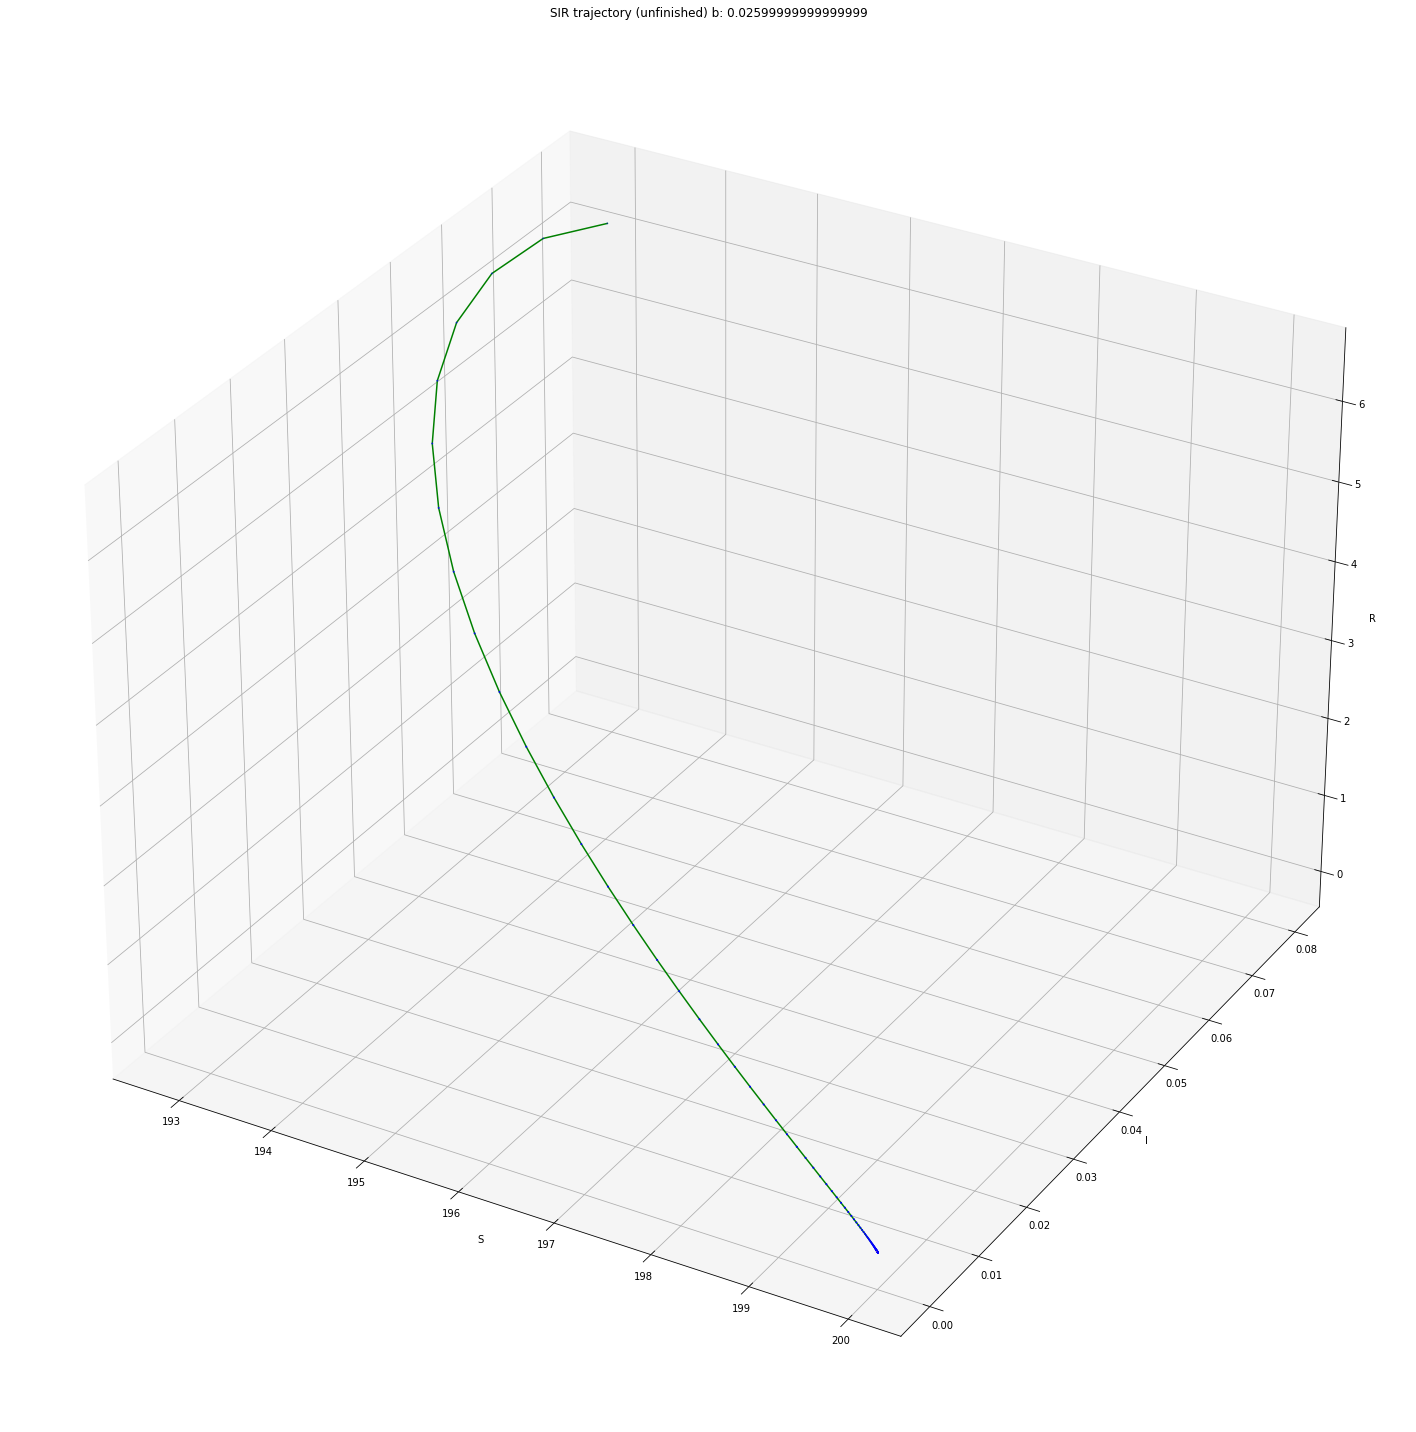

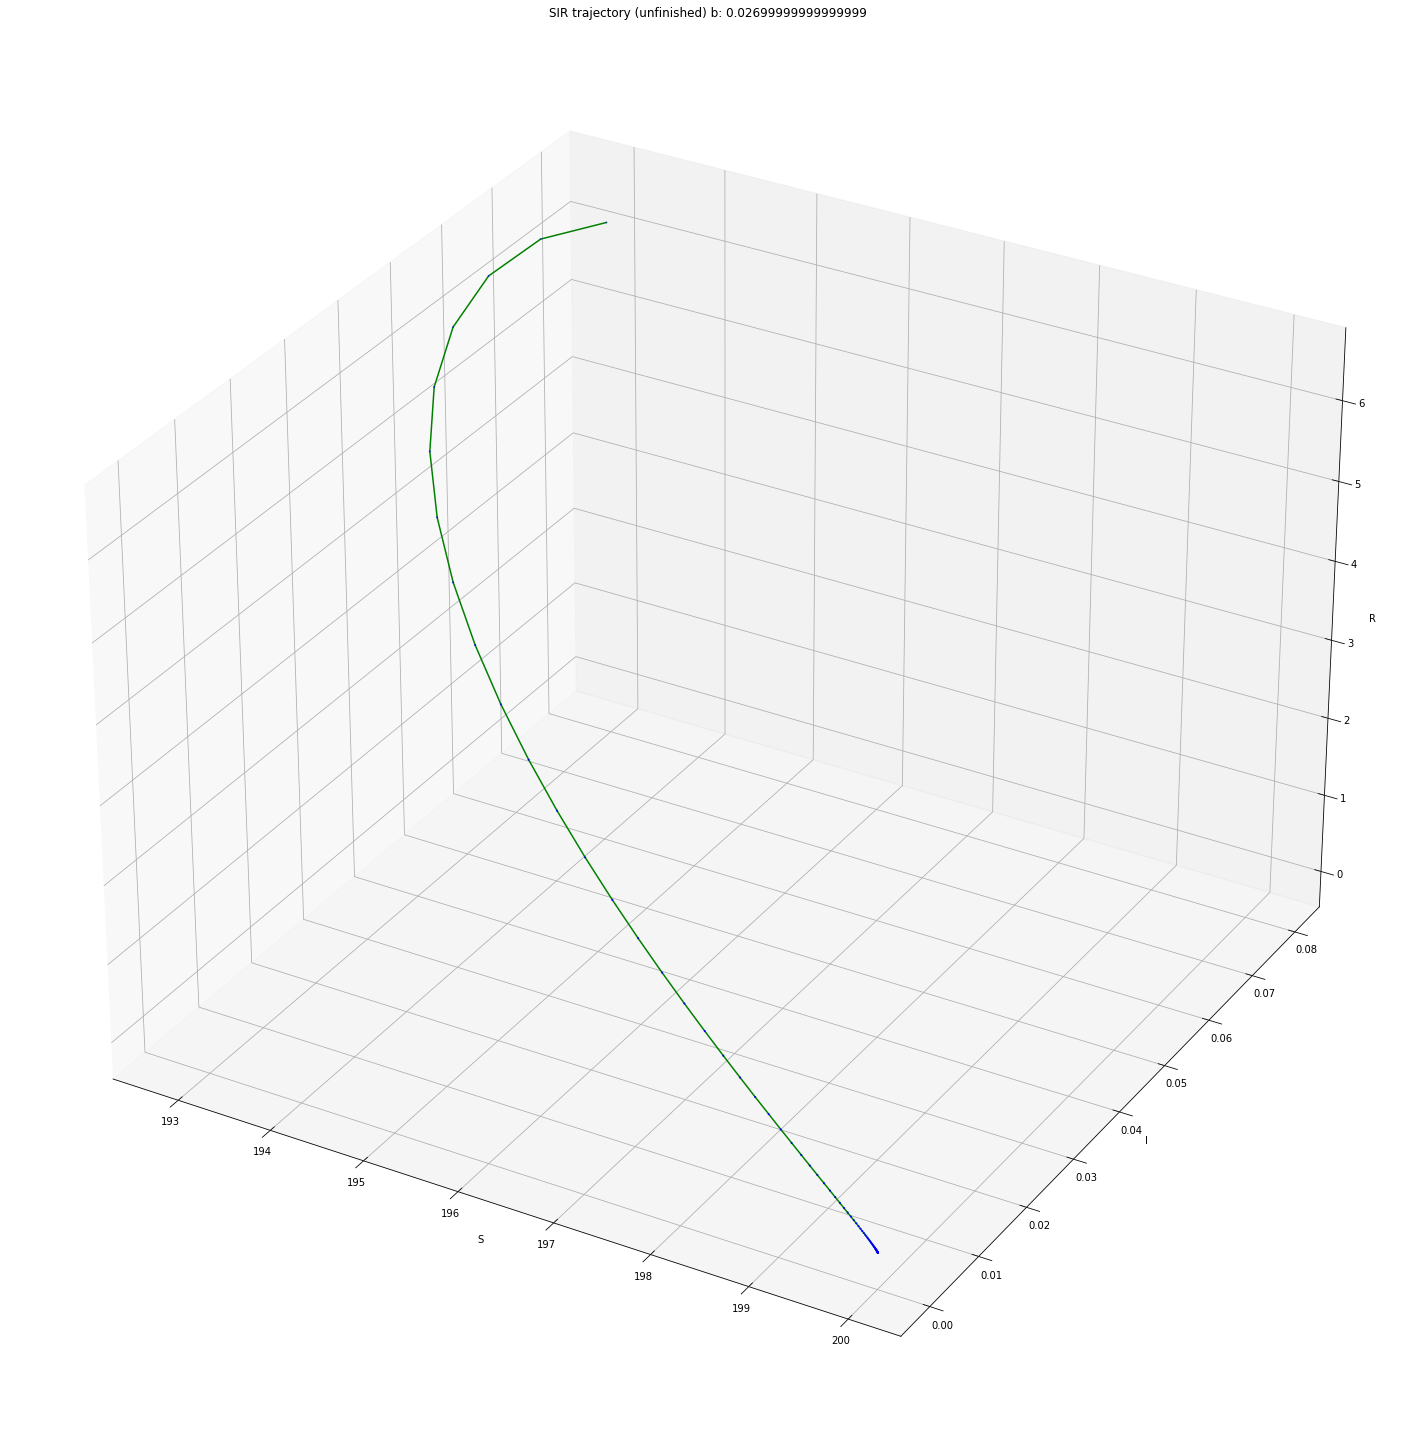

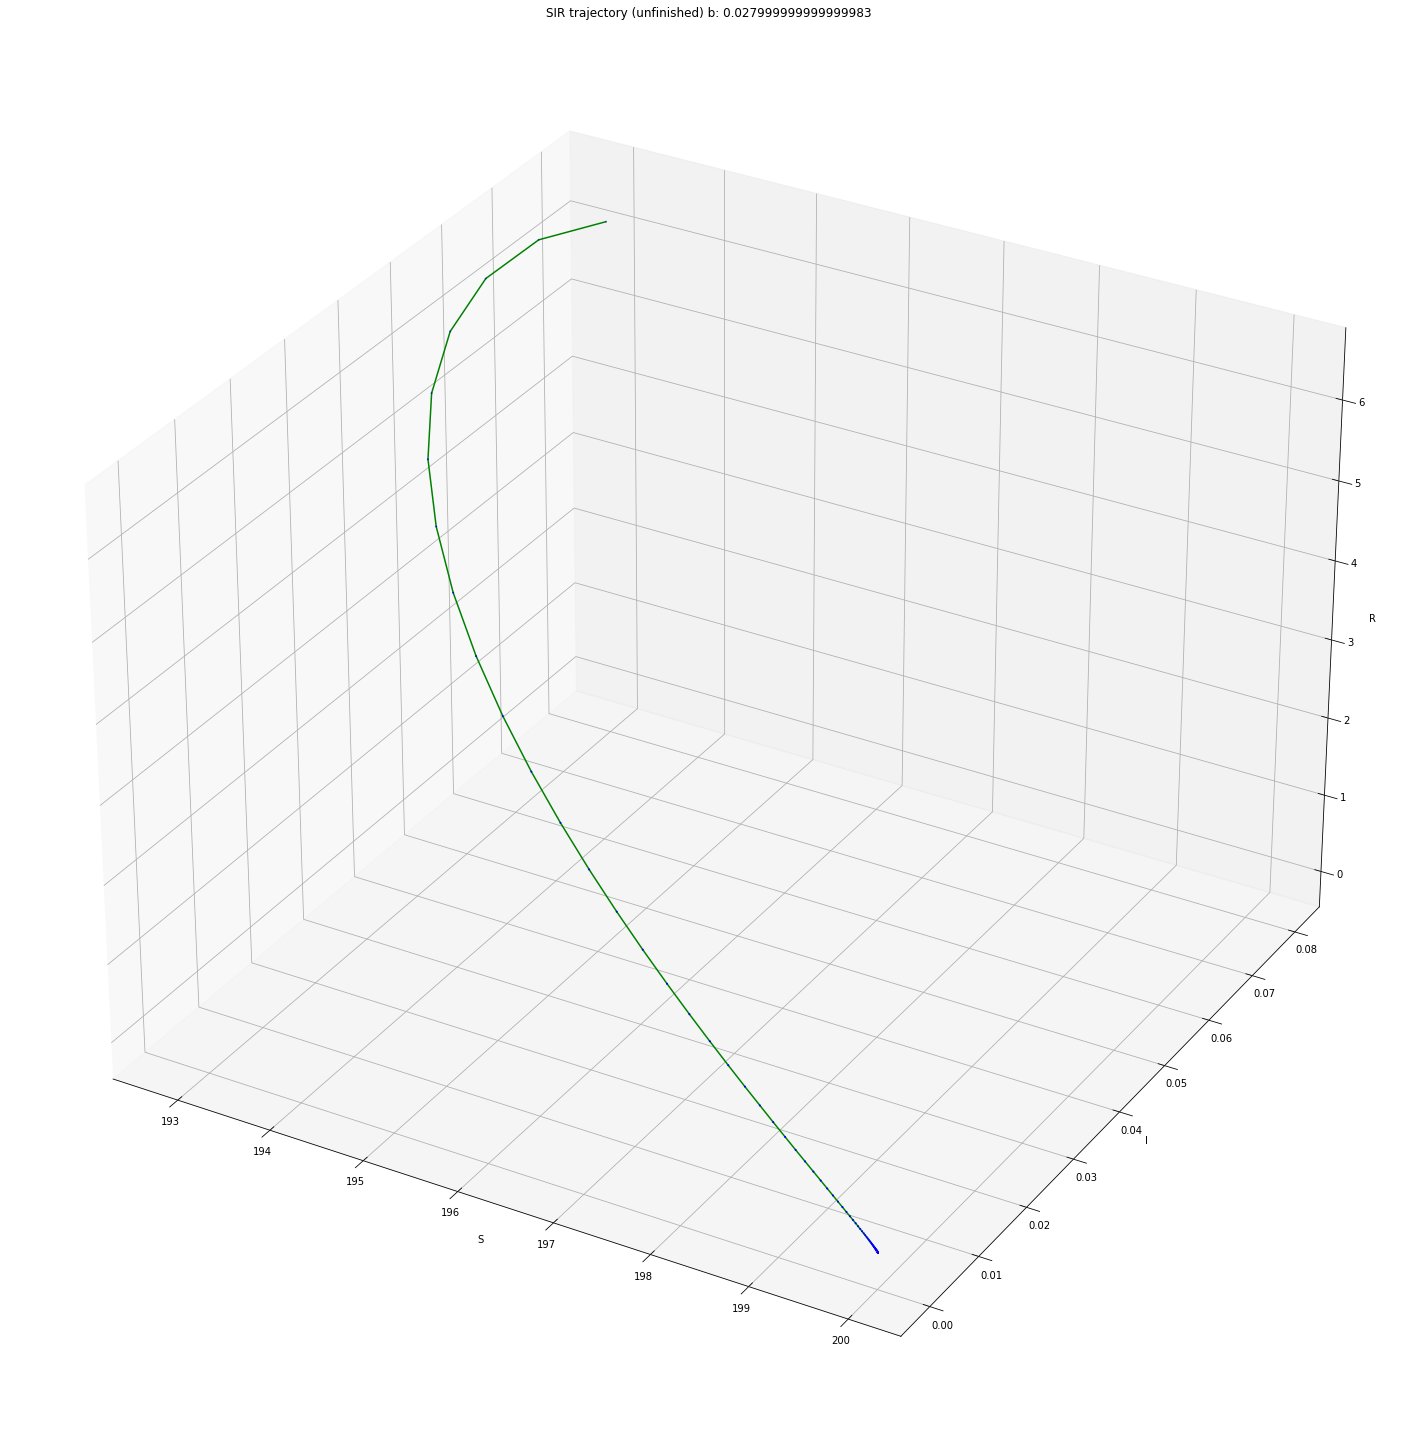

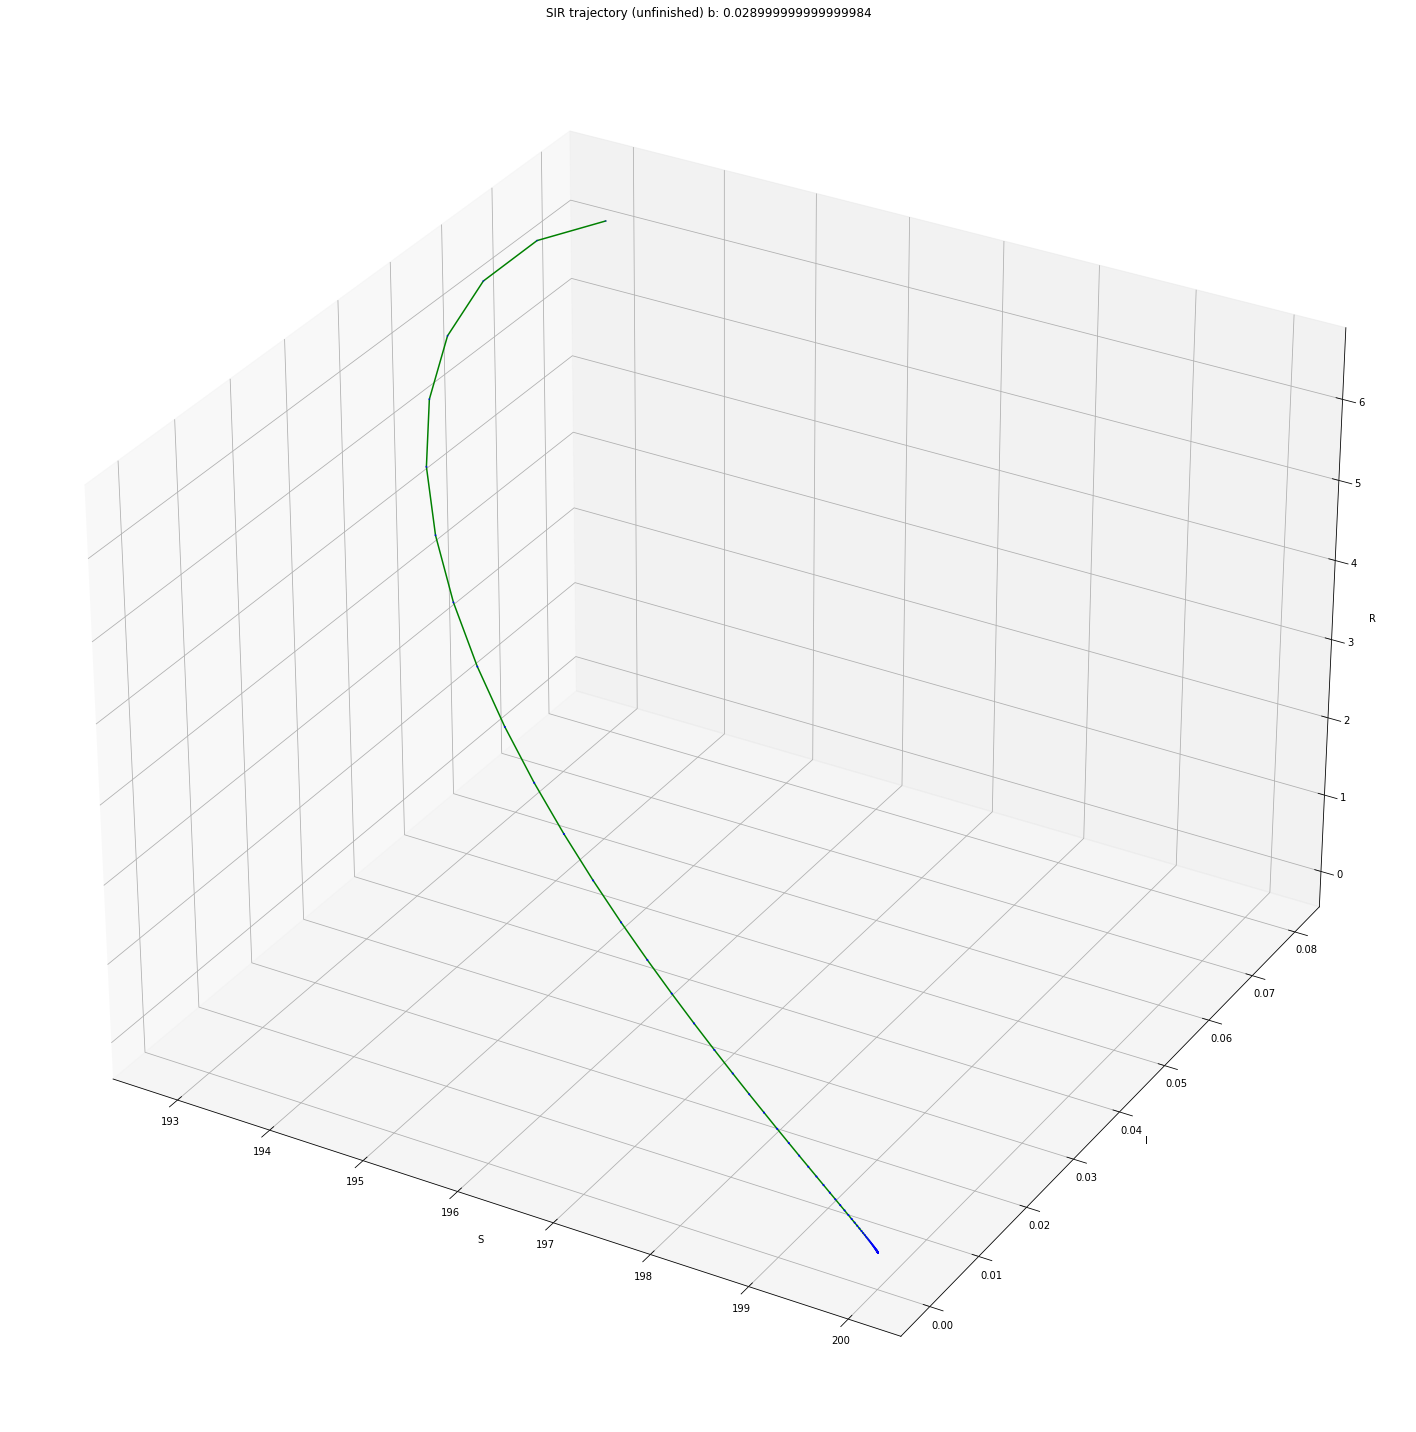

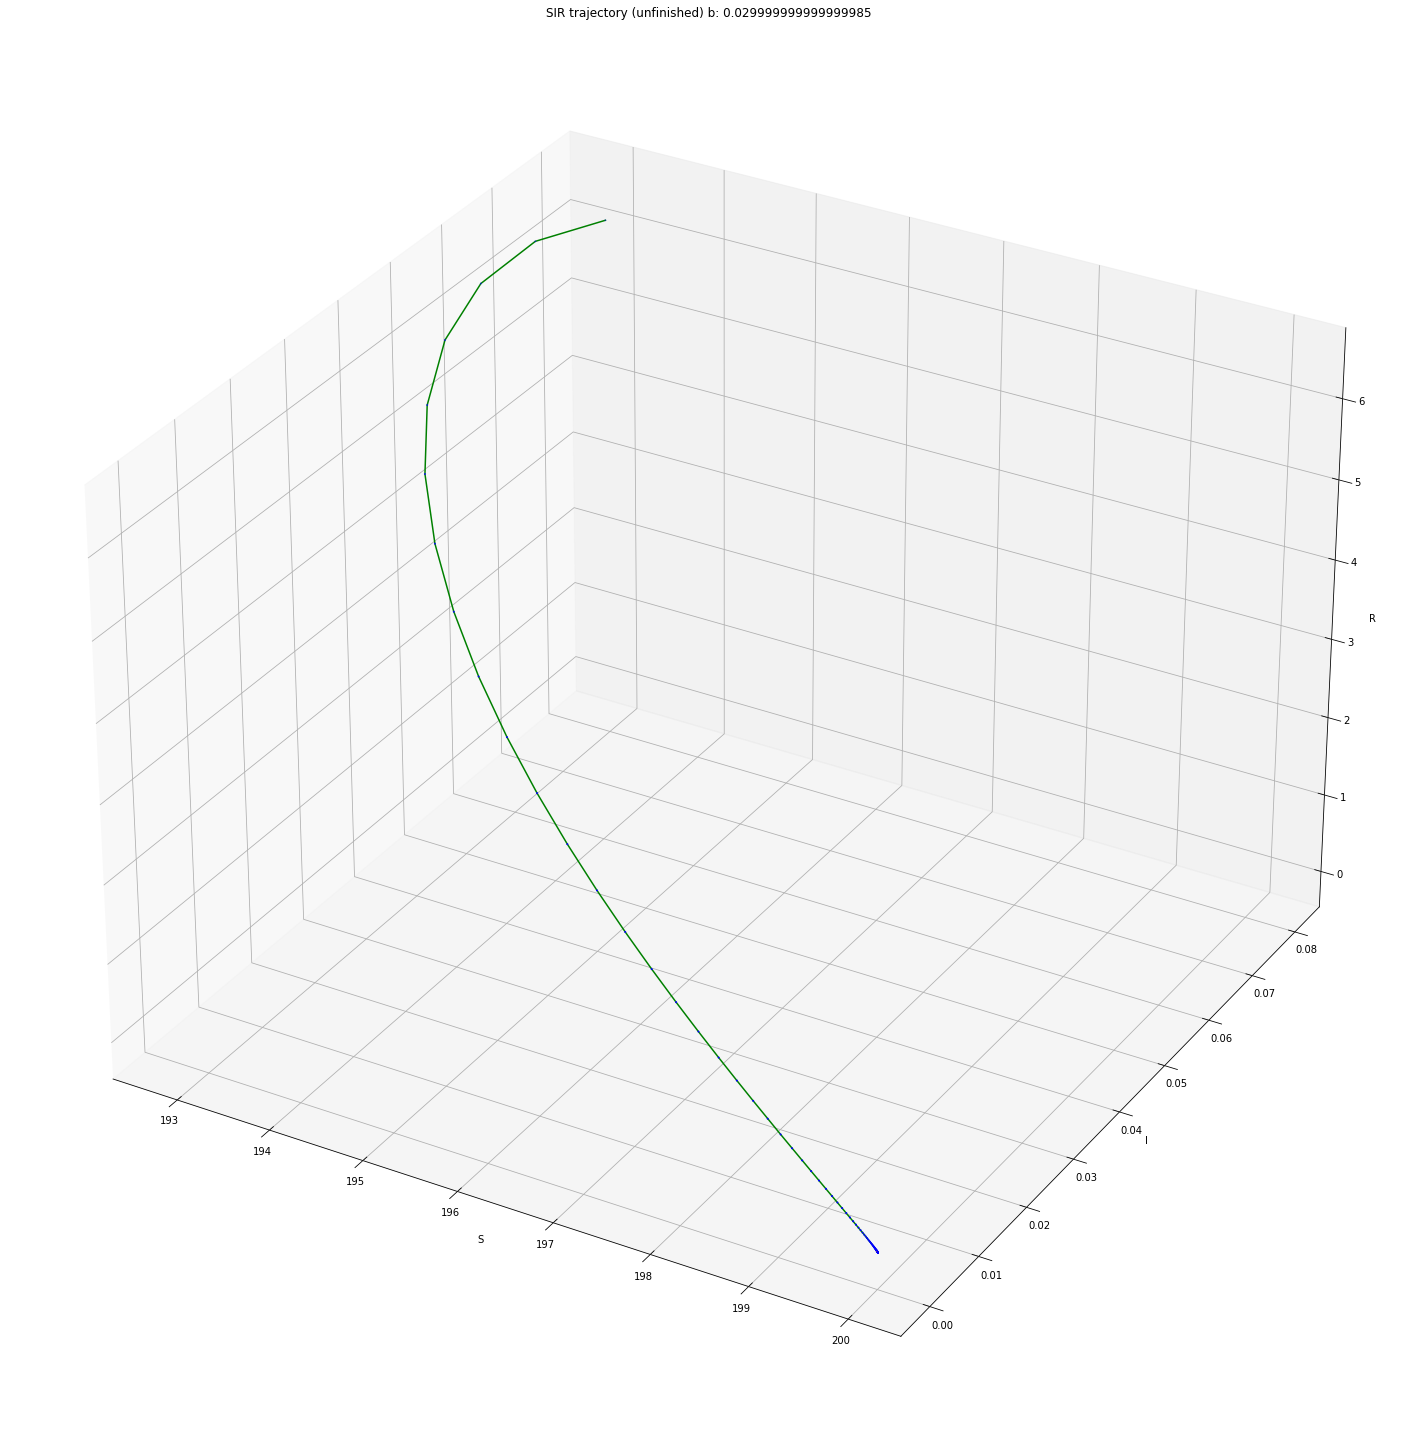

In [5]:
for i in np.arange(0.01,0.031, 0.001):
    plot_SIR_trajectories(t_0=t_0, b=i, mu0=mu0, mu1=mu1, beta=beta, A=A, d=d, nu=nu)
